In [628]:
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

white_wine=pd.read_csv('../practice/winequality-white.csv' , sep=';')
red_wine=pd.read_csv('../practice/winequality-red.csv' , sep=';')

In [629]:
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [630]:
white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [631]:
#check for any nan values in rows 
red_wine[red_wine.isna().any(axis=1)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [632]:
#check for any nan values in rows 
white_wine[white_wine.isna().any(axis=1)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [633]:
#replace space with underline
white_wine.columns=white_wine.columns.str.replace(' ', '_')
red_wine.columns=red_wine.columns.str.replace(' ', '_')
white_wine

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


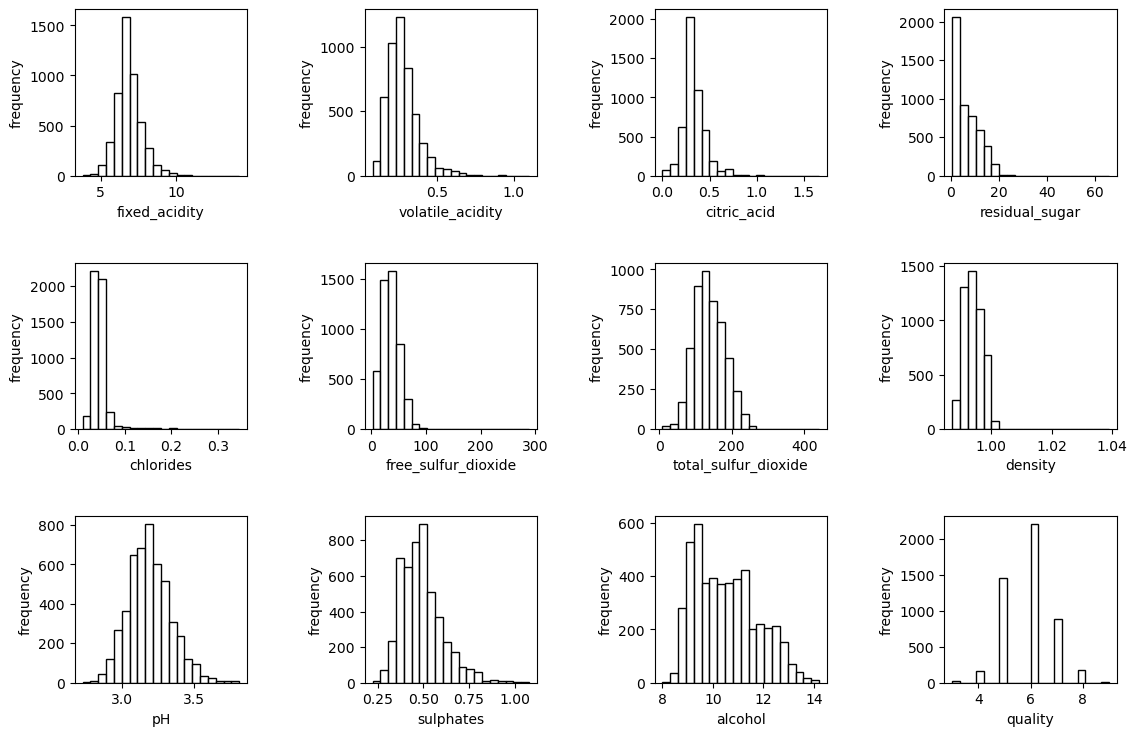

In [634]:
# outliers
# first plot all data to see how the data looks like
nrow = 3
ncolum=4
count=0
fig=plt.figure(figsize=(12,8))
for i in range(nrow):
    for j in range(ncolum):
        plt.subplot2grid((nrow,ncolum), (i,j))
        sns.histplot(white_wine[white_wine.columns[count]], bins=20, color='white',  edgecolor='black', linewidth=1.0)
        plt.ylabel('frequency')
        count +=1

plt.tight_layout(pad=3)



/Users/marziehbaes/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/marziehbaes/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/marziehbaes/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

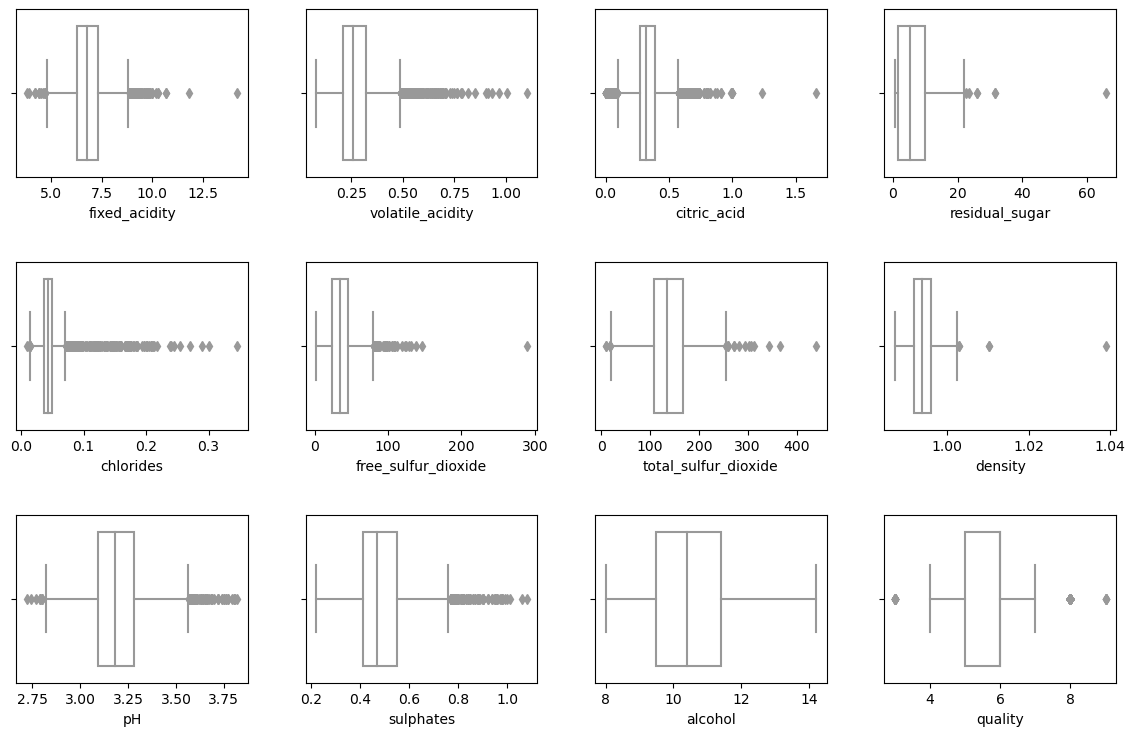

In [635]:
# outliers
# first plot all data to see how the data looks like
nrow = 3
ncolum=4
count=0
fig=plt.figure(figsize=(12,8))
for i in range(nrow):
    for j in range(ncolum):
        plt.subplot2grid((nrow,ncolum), (i,j))
        sns.boxplot(white_wine[white_wine.columns[count]],color='white')
        count +=1

plt.tight_layout(pad=3)


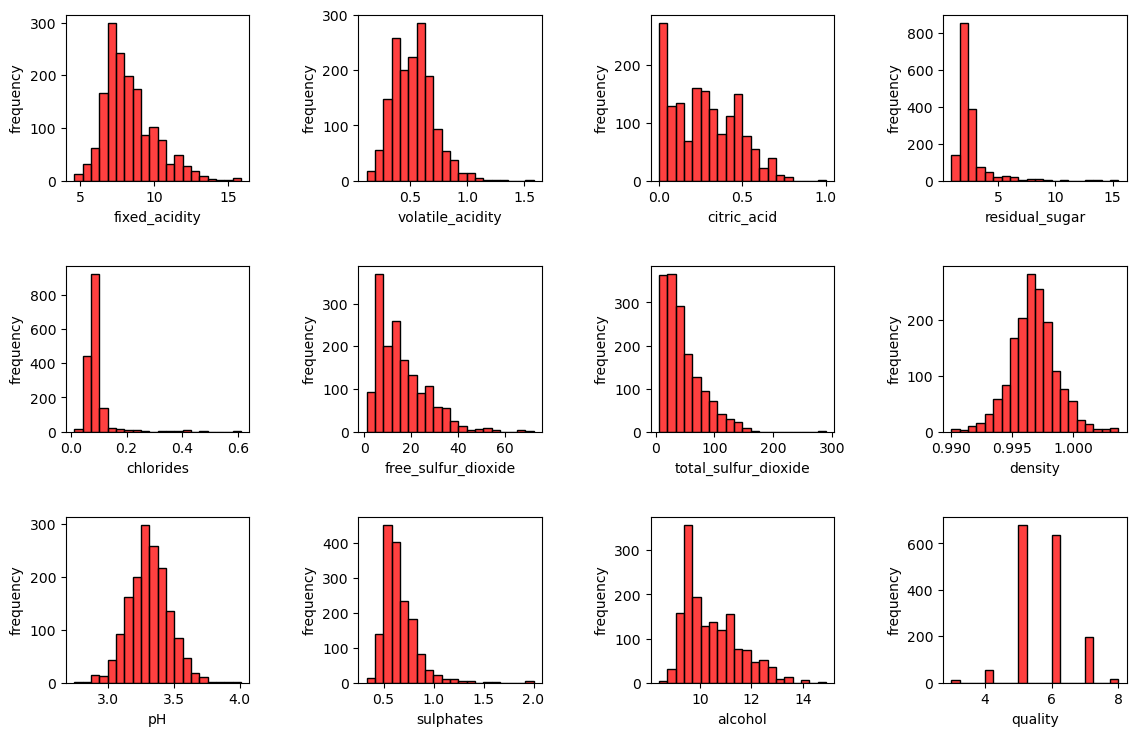

In [636]:
# outliers
# first plot all data to see how the data looks like
nrow = 3
ncolum=4
count=0
fig=plt.figure(figsize=(12,8))
for i in range(nrow):
    for j in range(ncolum):
        plt.subplot2grid((nrow,ncolum), (i,j))
        sns.histplot(red_wine[red_wine.columns[count]], bins=20, color='red',  edgecolor='black', linewidth=1.0)
        plt.ylabel('frequency')
        count +=1

plt.tight_layout(pad=3)

/Users/marziehbaes/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/marziehbaes/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/marziehbaes/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

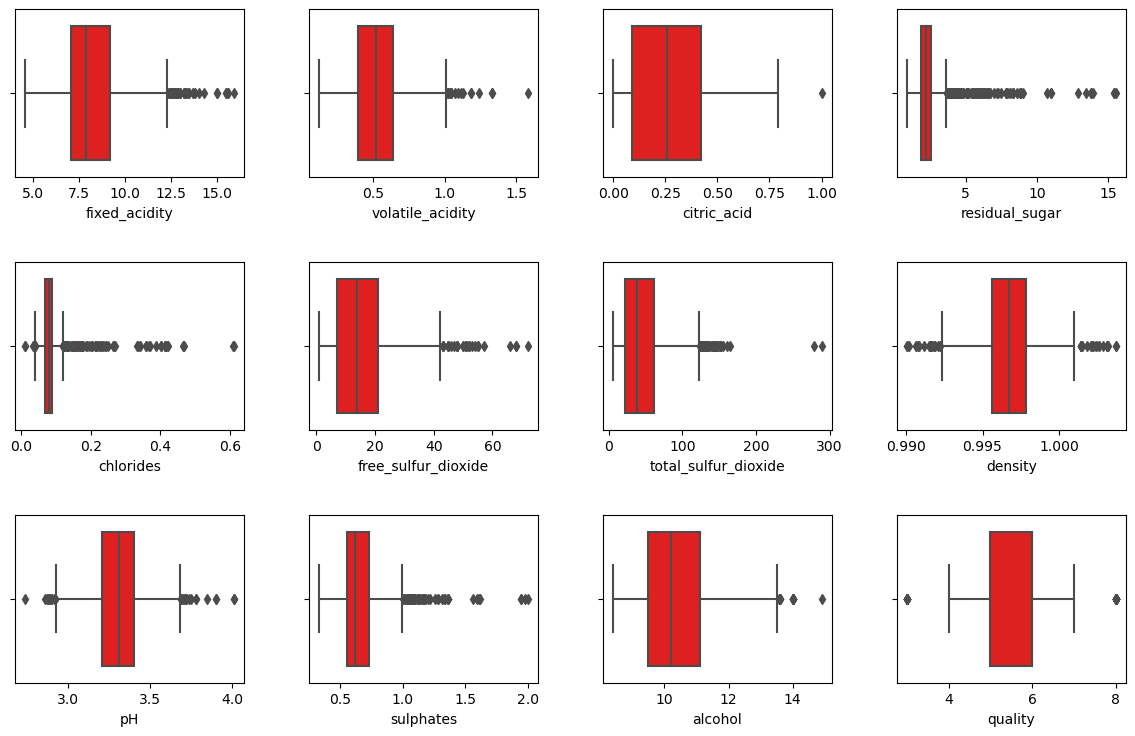

In [637]:
# outliers
# first plot all data to see how the data looks like
nrow = 3
ncolum=4
count=0
fig=plt.figure(figsize=(12,8))
for i in range(nrow):
    for j in range(ncolum):
        plt.subplot2grid((nrow,ncolum), (i,j))
        sns.boxplot(red_wine[red_wine.columns[count]],color='red')
        count +=1

plt.tight_layout(pad=3)

In [638]:
# using IQR to remove the outliers
def outliers_idr(df):
    
    num=df.count(axis=1)
    num_col=num[1]
    Q1=np.zeros((1,num_col))
    Q3=np.zeros((1,num_col))
    IQR=np.zeros((1,num_col))
    i=0
    for column in df:

        Q1[0,i] = df[column].quantile(0.25)
        Q3[0,i] = df[column].quantile(0.75)
        IQR[0,i]=Q3[0,i]-Q1[0,i]

        df_out= df[(df[column] <= (Q3[0,i]+(IQR[0,i]*1.5))) & (df[column] >= (Q1[0,i]-(IQR[0,i]*1.5)))]
        df=df_out
        i=i+1
    return df_out


df_r=outliers_idr(red_wine)
df_w=outliers_idr(white_wine)

In [639]:
#how many percentages of data were outliers
(white_wine.shape[0]- df_w.shape[0])/100

10.83

In [640]:
#how many percentages of data were outliers
(red_wine.shape[0]- df_r.shape[0])/100

4.75

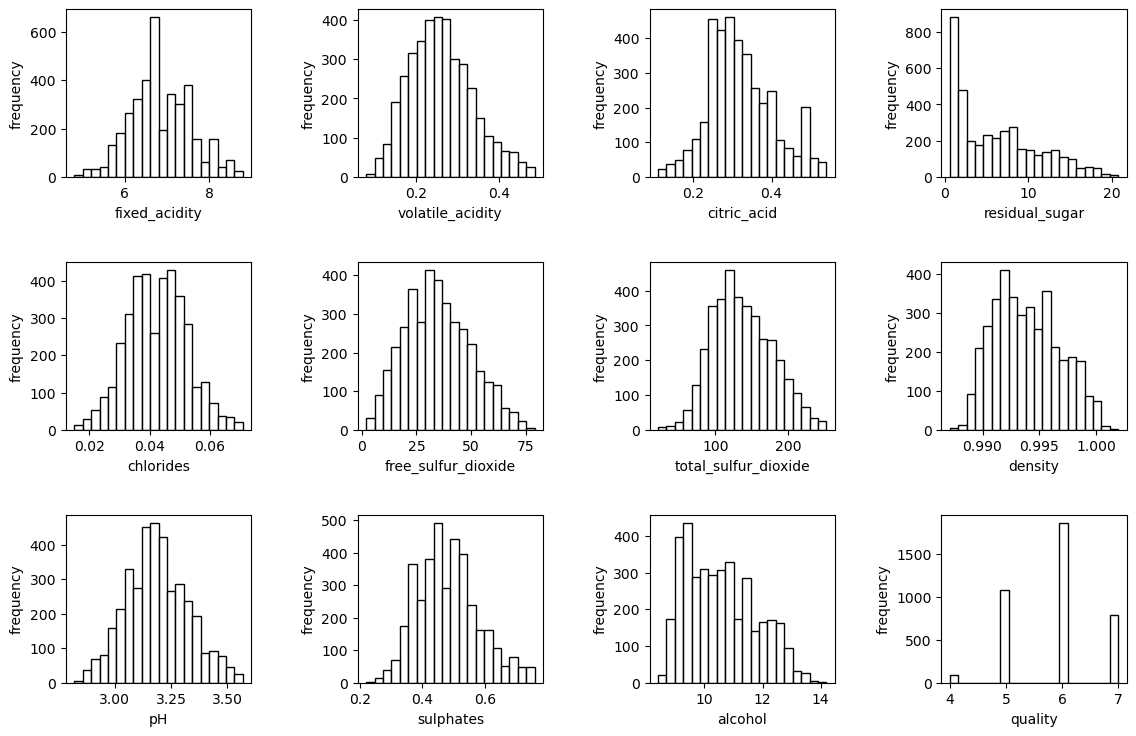

In [641]:
# plot data after outliera have been removed
nrow = 3
ncolum=4
count=0
fig=plt.figure(figsize=(12,8))
for i in range(nrow):
    for j in range(ncolum):
        plt.subplot2grid((nrow,ncolum), (i,j))
        sns.histplot(df_w[df_w.columns[count]], bins=20, color='white',  edgecolor='black', linewidth=1.0)
        plt.ylabel('frequency')
        count +=1

plt.tight_layout(pad=3)

/Users/marziehbaes/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/marziehbaes/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/marziehbaes/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

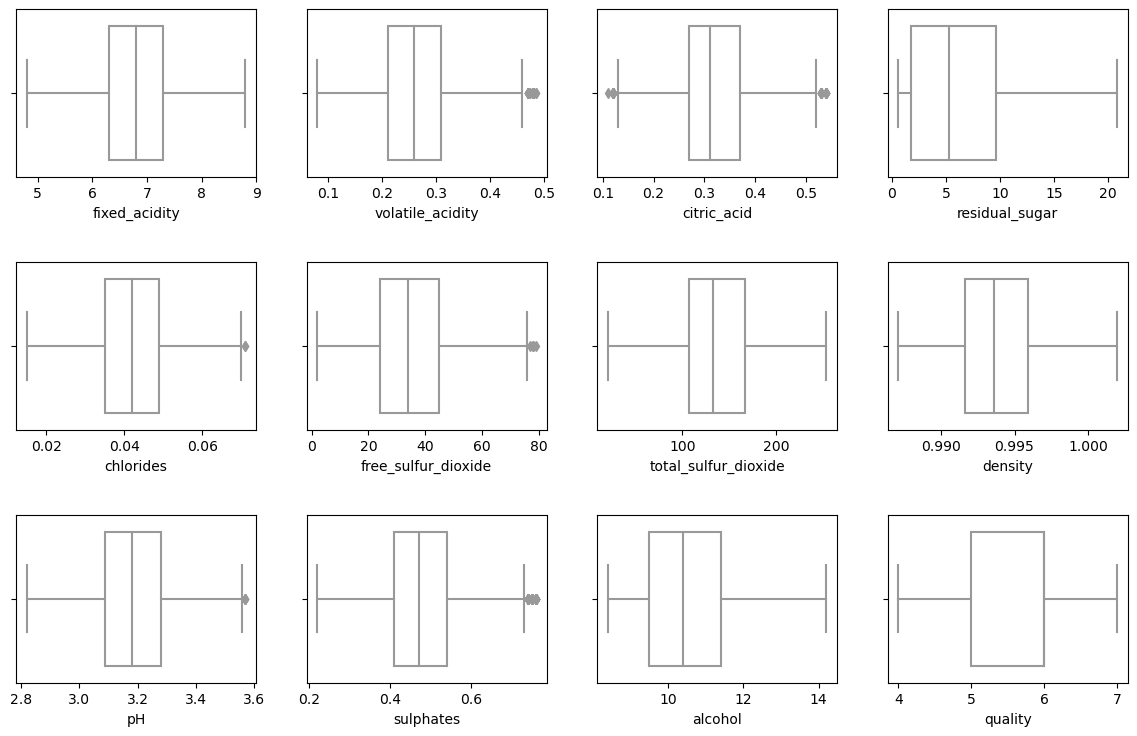

In [642]:
# plot after removing outliers
nrow = 3
ncolum=4
count=0
fig=plt.figure(figsize=(12,8))
for i in range(nrow):
    for j in range(ncolum):
        plt.subplot2grid((nrow,ncolum), (i,j))
        sns.boxplot(df_w[df_w.columns[count]],color='white')
        count +=1

plt.tight_layout(pad=3)

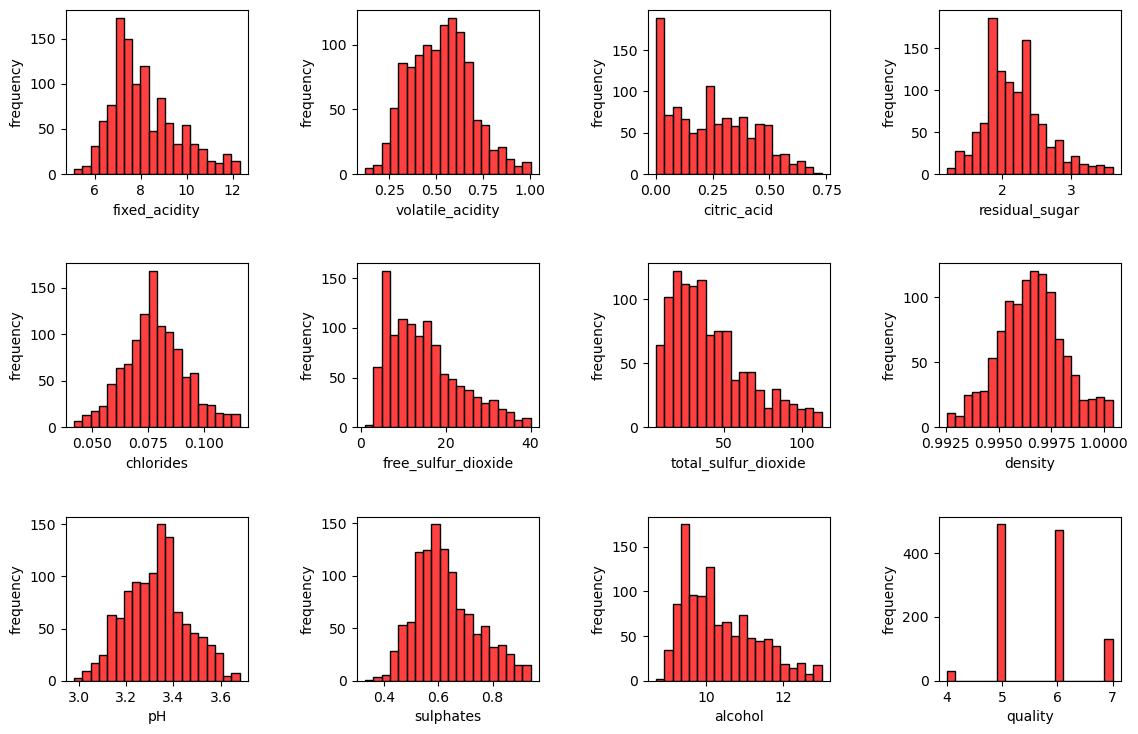

In [643]:
# plot after removing outliers
nrow = 3
ncolum=4
count=0
fig=plt.figure(figsize=(12,8))
for i in range(nrow):
    for j in range(ncolum):
        plt.subplot2grid((nrow,ncolum), (i,j))
        sns.histplot(df_r[df_r.columns[count]], bins=20, color='red',  edgecolor='black', linewidth=1.0)
        plt.ylabel('frequency')
        count +=1

plt.tight_layout(pad=3)

/Users/marziehbaes/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/marziehbaes/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/marziehbaes/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

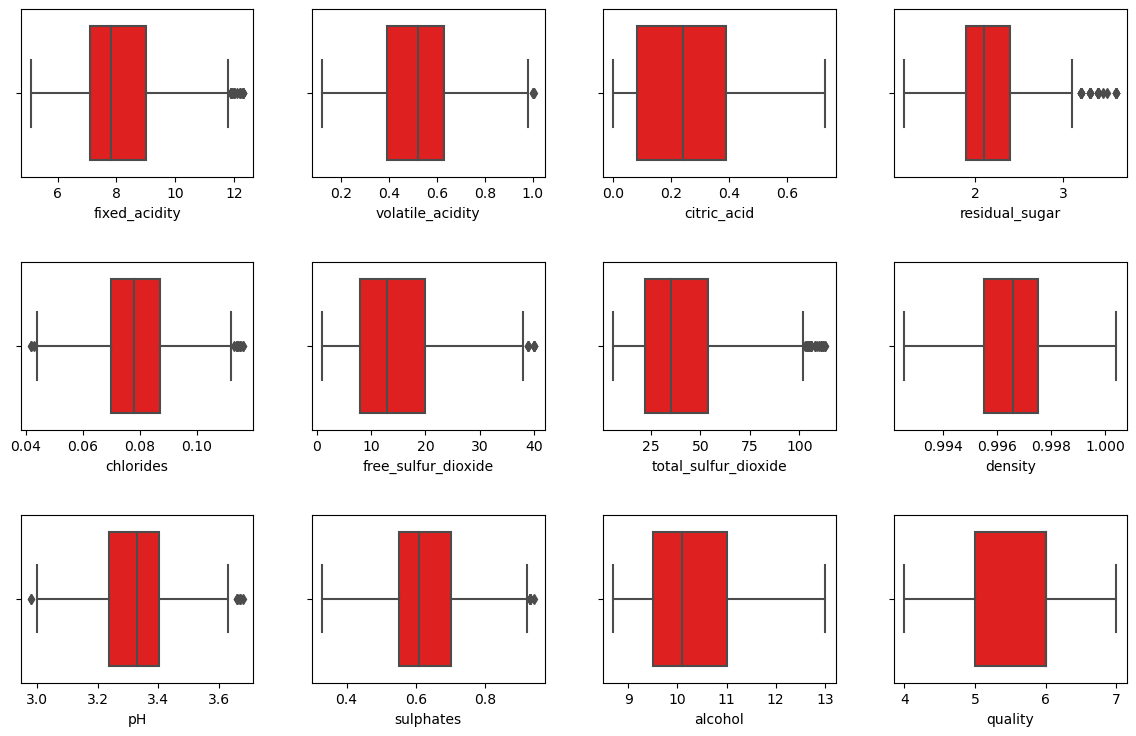

In [644]:
# plot after removing outliers
nrow = 3
ncolum=4
count=0
fig=plt.figure(figsize=(12,8))
for i in range(nrow):
    for j in range(ncolum):
        plt.subplot2grid((nrow,ncolum), (i,j))
        sns.boxplot(df_r[df_r.columns[count]],color='red')
        count +=1

plt.tight_layout(pad=3)

In [645]:
# there is problem in this case as all high quality wines were removed as outliers
#add a new column named quality_lable to data
df_r['quality_label']=df_r['quality'].apply(lambda x : 'low' if x <= 5 else 'medium' if x <= 7 else 'high')
df_r['quality_label']=pd.Categorical(df_r['quality_label'], categories=['low', 'medium', 'high'])
df_w['quality_label']=df_w['quality'].apply(lambda x : 'low' if x <= 5 else 'medium' if x <= 7 else 'high')
df_w['quality_label']=pd.Categorical(df_w['quality_label'], categories=['low', 'medium', 'high'])


/Users/marziehbaes/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'number of wines')

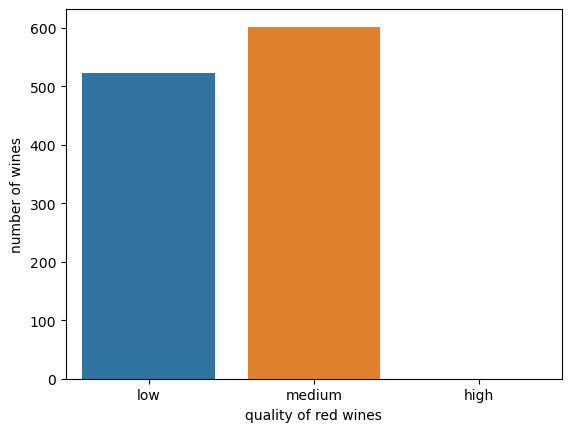

In [646]:
sns.barplot( df_r['quality_label'].value_counts().index, df_r['quality_label'].value_counts())
plt.xlabel('quality of red wines')
plt.ylabel('number of wines')

/Users/marziehbaes/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'number of wines')

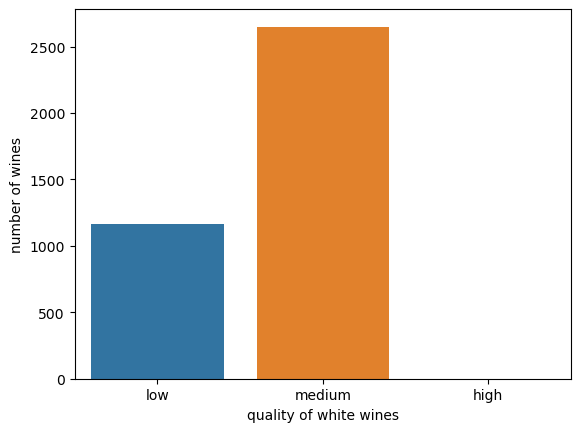

In [647]:
sns.barplot( df_w['quality_label'].value_counts().index, df_w['quality_label'].value_counts())
plt.xlabel('quality of white wines')
plt.ylabel('number of wines')

In [648]:
# so I use other method to remove outliers
def outliers_idr(df):
    
    num=df.count(axis=1)
    num_col=num[1]
    
    i=0
    for colu in df:
        mean_df=df[colu].mean()
        std_df=df[colu].std()
        df_out= df[(df[colu] <= 3*std_df+mean_df) & (df[colu] >= (mean_df-3*std_df))]
        df=df_out
        i=i+1
        
    return df_out


df_r=outliers_idr(red_wine)
df_w=outliers_idr(white_wine)

In [649]:
# there is problem in this case as all high quality wines were removed as outliers
#add a new column named quality_lable to data
df_r['quality_label']=df_r['quality'].apply(lambda x : 'low' if x <= 5 else 'medium' if x <= 7 else 'high')
df_r['quality_label']=pd.Categorical(df_r['quality_label'], categories=['low', 'medium', 'high'])
df_w['quality_label']=df_w['quality'].apply(lambda x : 'low' if x <= 5 else 'medium' if x <= 7 else 'high')
df_w['quality_label']=pd.Categorical(df_w['quality_label'], categories=['low', 'medium', 'high'])


/Users/marziehbaes/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'number of wines')

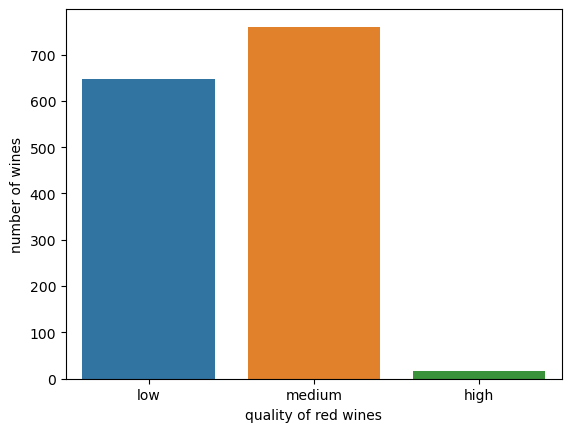

In [650]:
sns.barplot( df_r['quality_label'].value_counts().index, df_r['quality_label'].value_counts())
plt.xlabel('quality of red wines')
plt.ylabel('number of wines')

/Users/marziehbaes/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'number of wines')

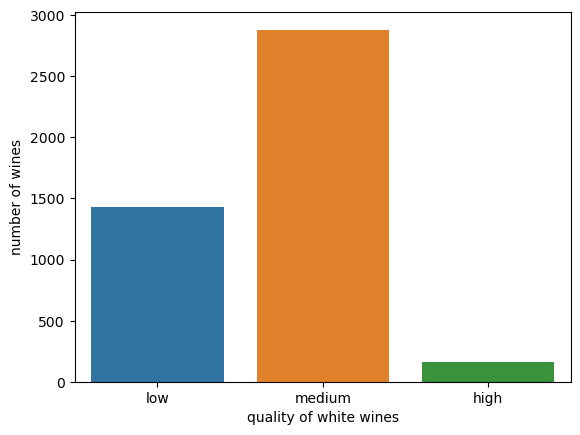

In [651]:
sns.barplot( df_w['quality_label'].value_counts().index, df_w['quality_label'].value_counts())
plt.xlabel('quality of white wines')
plt.ylabel('number of wines')

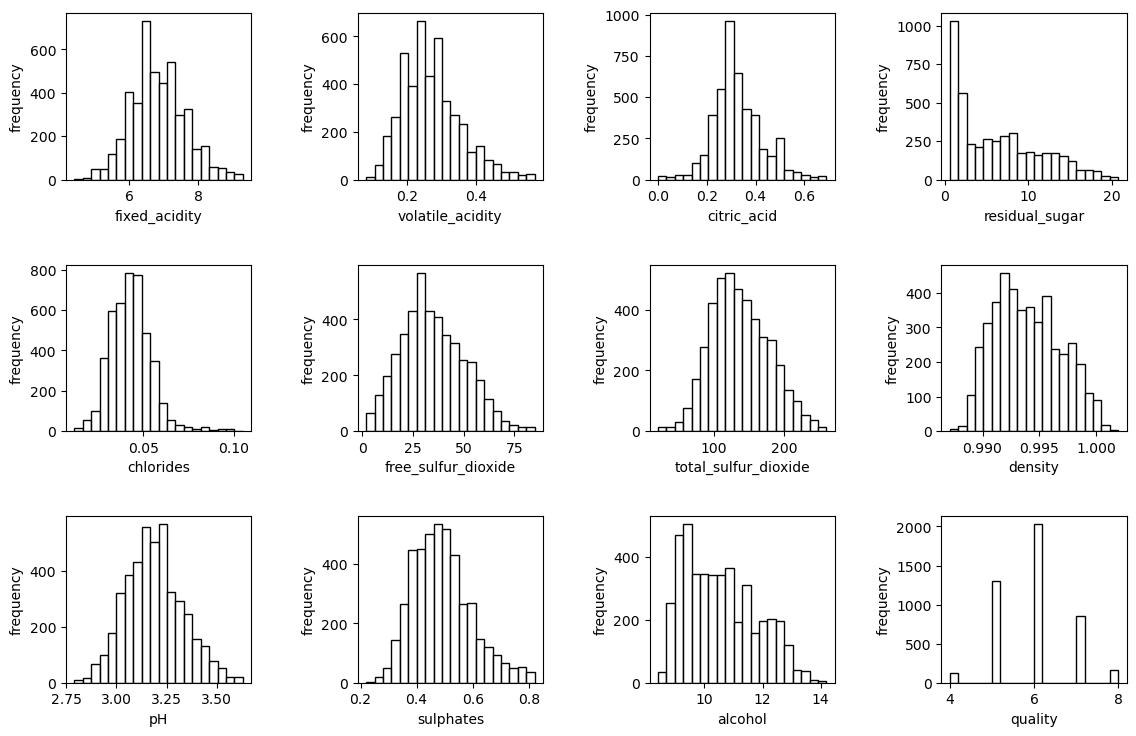

In [652]:
# plot data after outliera have been removed
nrow = 3
ncolum=4
count=0
fig=plt.figure(figsize=(12,8))
for i in range(nrow):
    for j in range(ncolum):
        plt.subplot2grid((nrow,ncolum), (i,j))
        sns.histplot(df_w[df_w.columns[count]], bins=20, color='white',  edgecolor='black', linewidth=1.0)
        plt.ylabel('frequency')
        count +=1

plt.tight_layout(pad=3)

/Users/marziehbaes/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/marziehbaes/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/marziehbaes/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

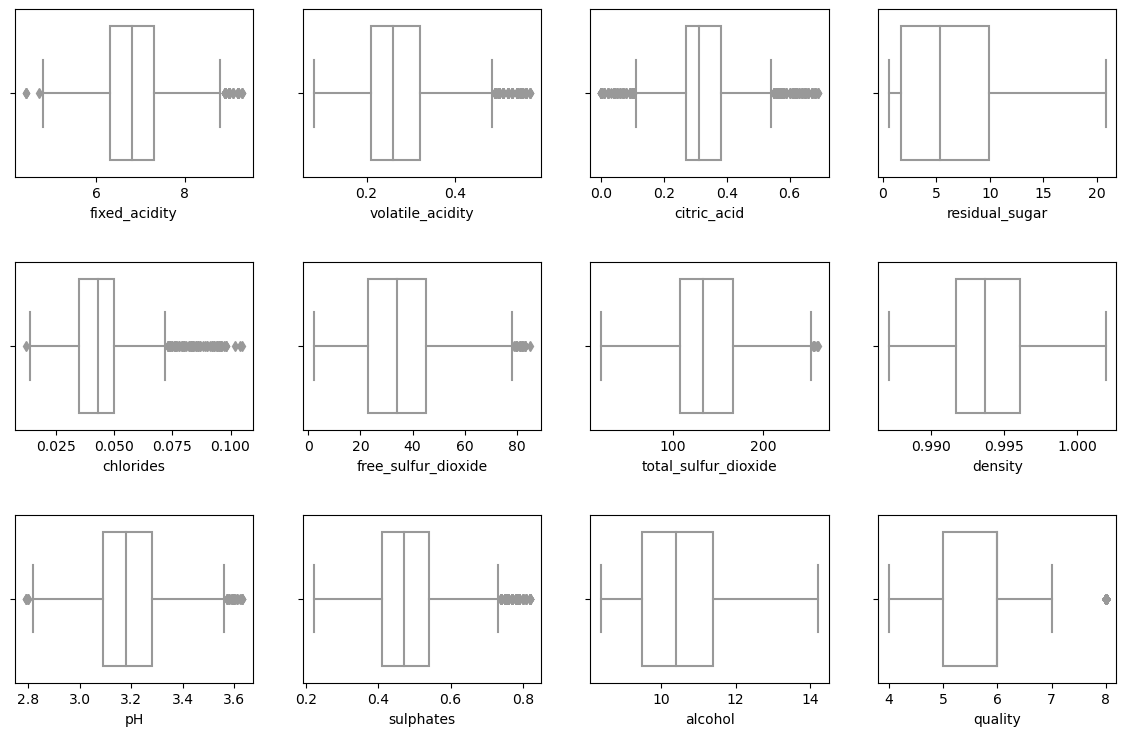

In [653]:
# plot after removing outliers
nrow = 3
ncolum=4
count=0
fig=plt.figure(figsize=(12,8))
for i in range(nrow):
    for j in range(ncolum):
        plt.subplot2grid((nrow,ncolum), (i,j))
        sns.boxplot(df_w[df_w.columns[count]],color='white')
        count +=1

plt.tight_layout(pad=3)

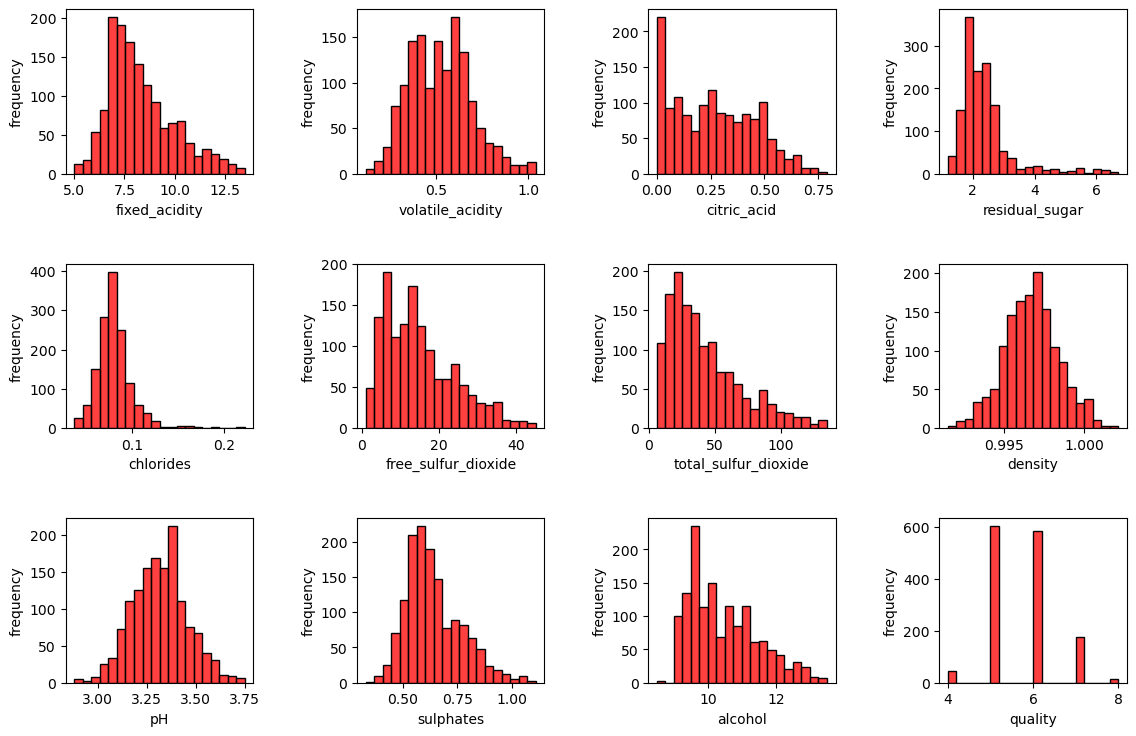

In [654]:
# plot after removing outliers
nrow = 3
ncolum=4
count=0
fig=plt.figure(figsize=(12,8))
for i in range(nrow):
    for j in range(ncolum):
        plt.subplot2grid((nrow,ncolum), (i,j))
        sns.histplot(df_r[df_r.columns[count]], bins=20, color='red',  edgecolor='black', linewidth=1.0)
        plt.ylabel('frequency')
        count +=1

plt.tight_layout(pad=3)

/Users/marziehbaes/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/marziehbaes/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/marziehbaes/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

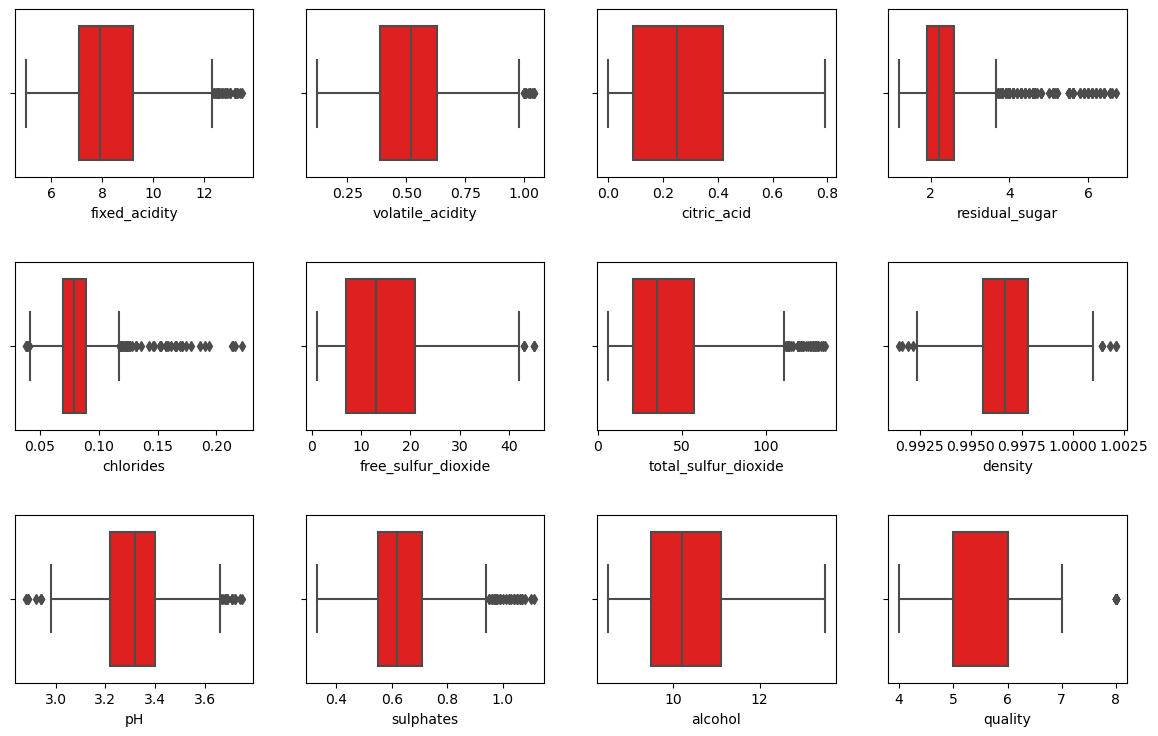

In [655]:
# plot after removing outliers
nrow = 3
ncolum=4
count=0
fig=plt.figure(figsize=(12,8))
for i in range(nrow):
    for j in range(ncolum):
        plt.subplot2grid((nrow,ncolum), (i,j))
        sns.boxplot(df_r[df_r.columns[count]],color='red')
        count +=1

plt.tight_layout(pad=3)

In [656]:
#how many percentages of data were outliers
(red_wine.shape[0]- df_r.shape[0])/100

1.75

In [657]:
#how many percentages of data were outliers
(white_wine.shape[0]- df_w.shape[0])/100

4.29

In [658]:
df_w['quality_label'].value_counts()

medium    2880
low       1428
high       161
Name: quality_label, dtype: int64

Text(0.5, 1.0, 'Red wine')

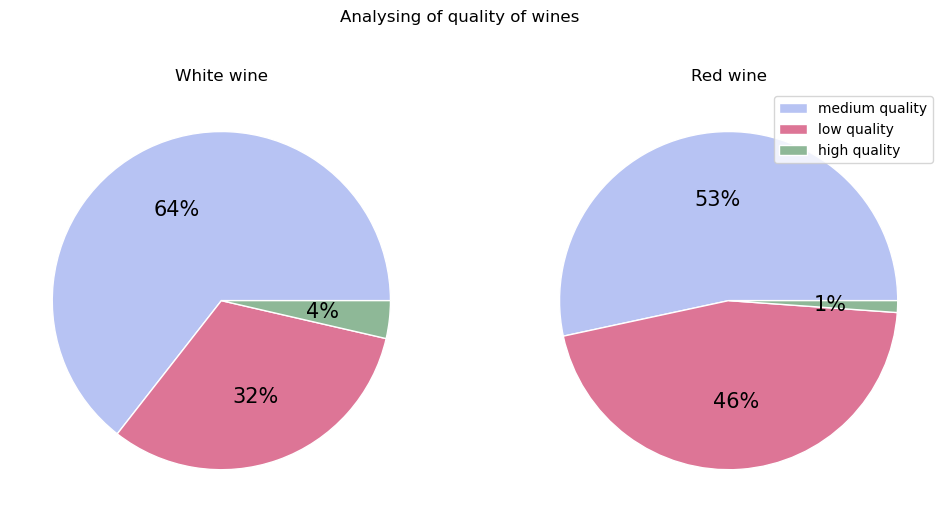

In [711]:
# how many percentage of wines have low, high and medium quality?
colors = ['#B7C3F3', '#DD7596', '#8EB897']
fig=plt.figure(figsize=(12,6))
plt.suptitle('Analysing of quality of wines')
plt.subplot2grid((1,2),(0,0))
plt.pie(df_w['quality_label'].value_counts(), autopct='%.0f%%',textprops={'fontsize': 15}, 
labeldistance=1.15, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=colors)
#plt.legend(['medium quality', 'low quality','high quality'], loc=0)
plt.title('White wine')
plt.subplot2grid((1,2),(0,1))
plt.pie(df_r['quality_label'].value_counts(),  autopct='%.0f%%', textprops={'fontsize' : 15},
labeldistance=1.15, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=colors)
plt.legend(['medium quality', 'low quality','high quality'], loc=0)

plt.title('Red wine')

In [660]:
df_r.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000
mean,8.308146,0.522897,0.264115,2.385990,0.081270,14.952949,42.658708,0.996709,3.316721,0.640864,10.422776,5.659410
std,1.644533,0.168882,0.191162,0.859421,0.020358,9.167369,27.831363,0.001697,0.140946,0.126790,1.009241,0.778223
min,5.000000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.991500,2.880000,0.330000,8.500000,4.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995600,3.220000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,35.000000,0.996700,3.320000,0.620000,10.200000,6.000000
75%,9.200000,0.630000,0.420000,2.600000,0.089000,21.000000,57.000000,0.997800,3.400000,0.710000,11.100000,6.000000
max,13.500000,1.040000,0.790000,6.700000,0.222000,45.000000,135.000000,1.002100,3.750000,1.110000,13.500000,8.000000


In [661]:
# volatile acid is according to the standard of US (<1.2 for red and < 1.1 for white wine)
df_w.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4469.000000,4469.000000,4469.000000,4469.000000,4469.000000,4469.000000,4469.000000,4469.000000,4469.000000,4469.000000,4469.000000,4469.000000
mean,6.840982,0.270621,0.326695,6.415563,0.043105,34.845715,137.591407,0.993968,3.187995,0.485413,10.537077,5.915194
std,0.785104,0.085136,0.100878,4.955954,0.011508,15.399909,41.297292,0.002907,0.143240,0.105729,1.223274,0.854036
min,4.400000,0.080000,0.000000,0.600000,0.012000,2.000000,21.000000,0.987110,2.790000,0.220000,8.400000,4.000000
25%,6.300000,0.210000,0.270000,1.700000,0.035000,23.000000,108.000000,0.991680,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.310000,5.300000,0.043000,34.000000,133.000000,0.993700,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.380000,9.900000,0.050000,45.000000,166.000000,0.996100,3.280000,0.540000,11.400000,6.000000
max,9.300000,0.570000,0.690000,20.800000,0.105000,85.000000,260.000000,1.001960,3.630000,0.820000,14.200000,8.000000


In [662]:
# add a column to the data for percentage of bound sulfur: (total sulfur- free sulfur)/total sulfur
df_r['bound_sulfur']=(df_r['total_sulfur_dioxide']- df_r['free_sulfur_dioxide'])*100/df_r['total_sulfur_dioxide']
df_w['bound_sulfur']=(df_w['total_sulfur_dioxide']- df_w['free_sulfur_dioxide'])*100/df_w['total_sulfur_dioxide']
df_w


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label,bound_sulfur
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,medium,73.529412
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,medium,89.393939
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,medium,69.072165
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,medium,74.731183
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,medium,74.731183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,medium,73.913043
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,low,66.071429
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,medium,72.972973
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,medium,81.818182


In [665]:
# bound sulfur categories
df_r['bound-quality']=df_r['bound_sulfur'].apply(lambda x : 'L' if x <= 40 else 'M' if x <= 70 else 'H')
df_r['bound-quality']=pd.Categorical(df_r['bound-quality'], categories=['L', 'M', 'H'])
df_w['bound-quality']=df_w['bound_sulfur'].apply(lambda x : 'L' if x <= 40 else 'M' if x <= 70 else 'H')
df_w['bound-quality']=pd.Categorical(df_w['bound-quality'], categories=['L', 'M', 'H'])


In [669]:
df_r

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label,bound_sulfur,bound-quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low,67.647059,M
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,low,62.686567,M
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,low,72.222222,H
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,medium,71.666667,H
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low,67.647059,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,low,27.272727,L
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,medium,23.529412,L
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,medium,27.500000,L
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,low,27.272727,L


Text(0.5, 1.0, 'Red wine')

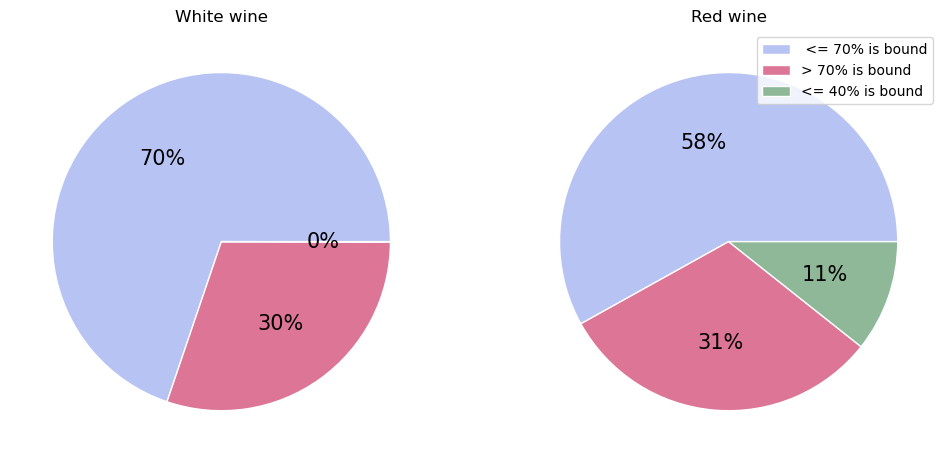

In [764]:
fig=plt.figure(figsize=(12,8))
plt.subplot2grid((1,2),(0,0))
plt.pie(df_w['bound-quality'].value_counts(),  autopct='%.0f%%', textprops={'fontsize' : 15},
labeldistance=1.15, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=colors)
labels = [' <= 70% is bound', '> 70% is bound', '<= 40% is bound']
plt.title('White wine')
plt.subplot2grid((1,2),(0,1))

plt.pie(df_r['bound-quality'].value_counts(),  autopct='%.0f%%', textprops={'fontsize' : 15},
labeldistance=1.15, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=colors)
plt.legend(labels)
plt.title('Red wine')


Text(0.5, 0.98, 'Corrolation between variables in red wine')

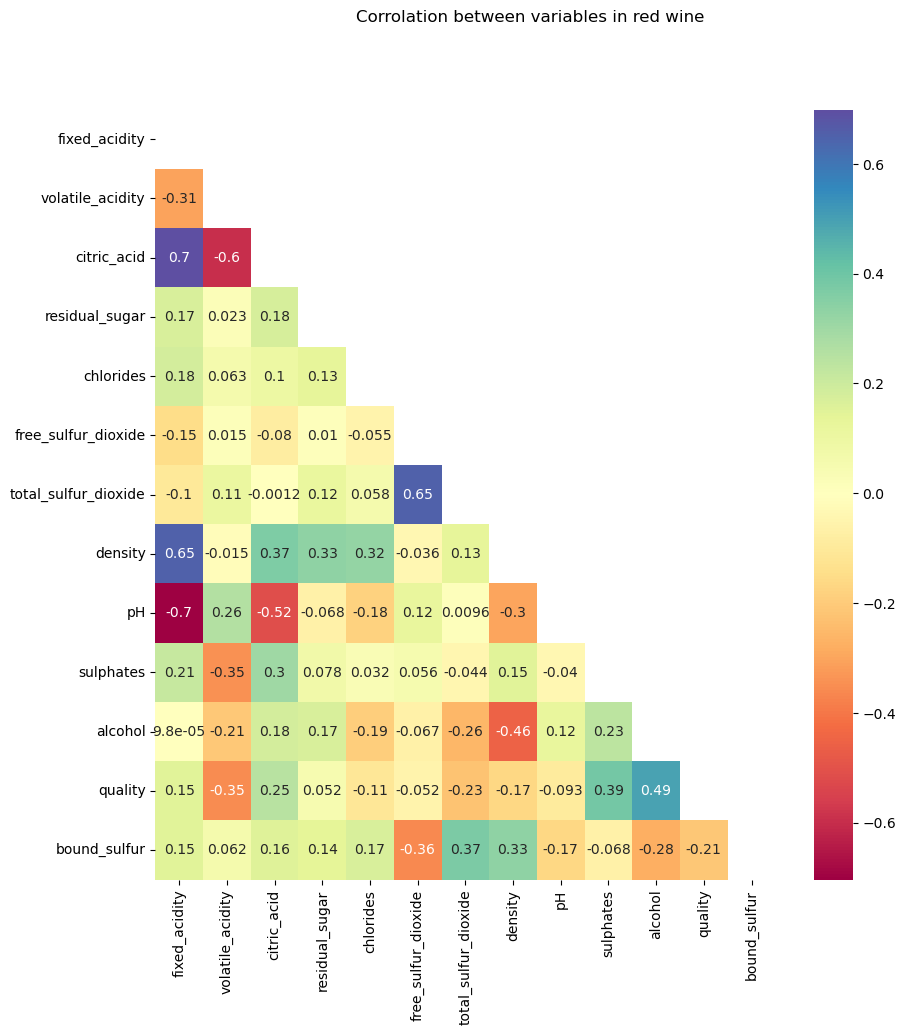

In [756]:
#covariance
fig=plt.figure(figsize=(10,10))
cov_r=df_r.corr()
mask = np.triu(np.ones_like(cov_r, dtype=bool))
sns.heatmap(cov_r, annot=True, mask=mask, cmap='Spectral')
plt.suptitle('Corrolation between variables in red wine')

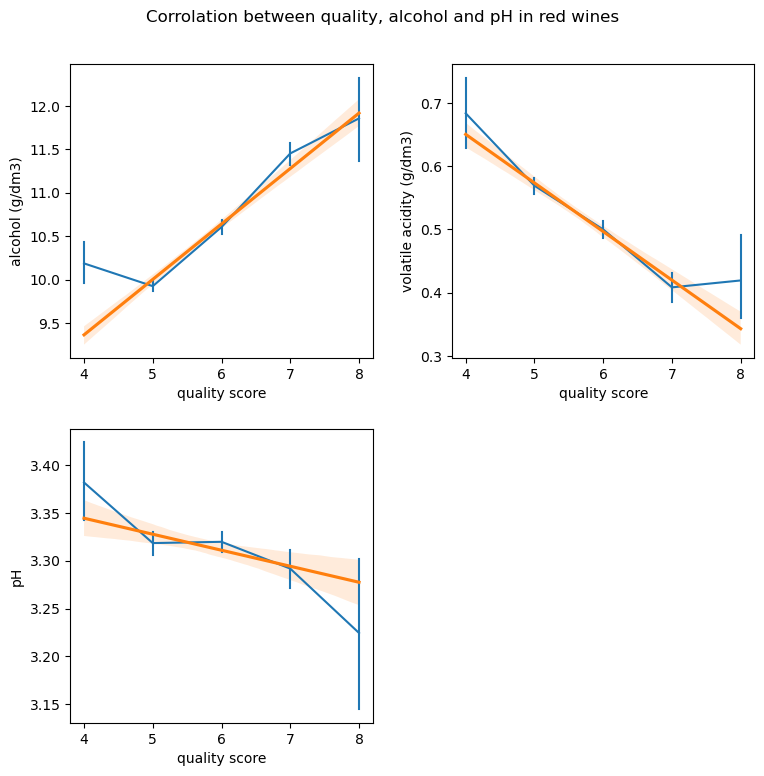

In [768]:
# plot fixed acidity and ph#

fig=plt.figure(figsize=(8,8))
plt.subplot2grid((2,2),(0,0))
plt.suptitle('Corrolation between quality, alcohol and pH in red wines' )
sns.lineplot(x=df_r['quality'], y=df_r['alcohol'],err_style='bars',ci=95)
sns.regplot(x='quality', y='alcohol', data=df_r, scatter=False)
plt.xlabel('quality score')
plt.ylabel('alcohol (g/dm3)')
plt.subplot2grid((2,2),(0,1))
sns.lineplot(x=df_r['quality'], y=df_r['volatile_acidity'],err_style='bars',ci=95)
sns.regplot(x='quality', y='volatile_acidity', data=df_r, scatter=False)
plt.xlabel('quality score')
plt.ylabel('volatile acidity (g/dm3)')
plt.subplot2grid((2,2),(1,0))
sns.lineplot(x=df_r['quality'], y=df_r['pH'],err_style='bars',ci=95)
sns.regplot(x='quality', y='pH', data=df_r, scatter=False)
plt.xlabel('quality score')
plt.ylabel('pH')
plt.tight_layout(pad=2)

Text(0.5, 0.98, 'Corrolation between variables in white wine')

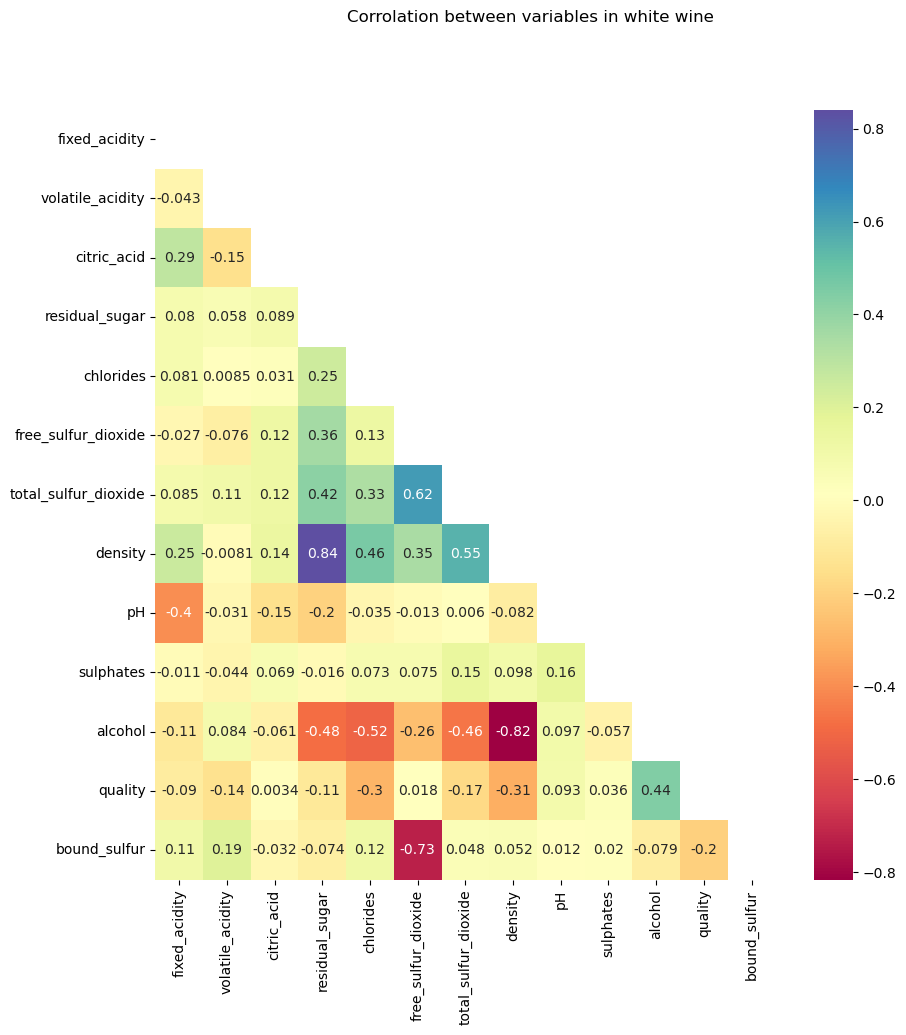

In [758]:
#covariance
fig=plt.figure(figsize=(10,10))
cov_w=df_w.corr()
mask = np.triu(np.ones_like(cov_w, dtype=bool))
sns.heatmap(cov_w, annot=True, mask=mask, cmap='Spectral')
plt.suptitle('Corrolation between variables in white wine')

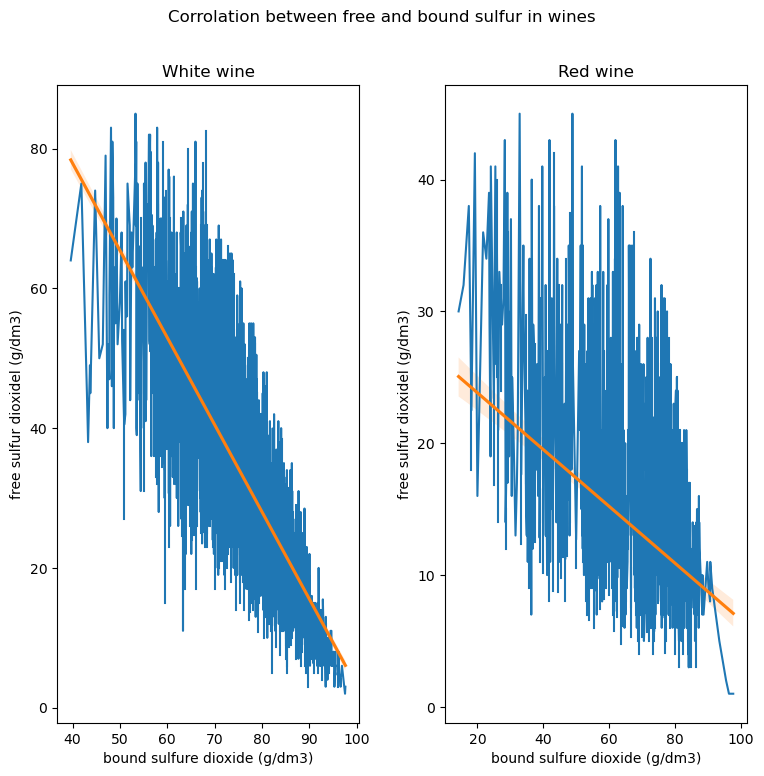

In [825]:
fig=plt.figure(figsize=(8,8))
plt.subplot2grid((1,2),(0,1))
plt.suptitle('Corrolation between free and bound sulfur in wines' )
sns.lineplot(x=df_r['bound_sulfur'], y=df_r['free_sulfur_dioxide'],err_style='bars',ci=95)
sns.regplot(x='bound_sulfur', y='free_sulfur_dioxide', data=df_r, scatter=False)
plt.xlabel('bound sulfure dioxide (g/dm3)')
plt.ylabel('free sulfur dioxidel (g/dm3)')
plt.title('Red wine')
plt.subplot2grid((1,2),(0,0))
sns.lineplot(x=df_w['bound_sulfur'], y=df_w['free_sulfur_dioxide'],err_style='bars',ci=95)
sns.regplot(x='bound_sulfur', y='free_sulfur_dioxide', data=df_w, scatter=False)
plt.xlabel('bound sulfure dioxide (g/dm3)')
plt.ylabel('free sulfur dioxidel (g/dm3)')
plt.title('White wine')
plt.tight_layout(pad=2)

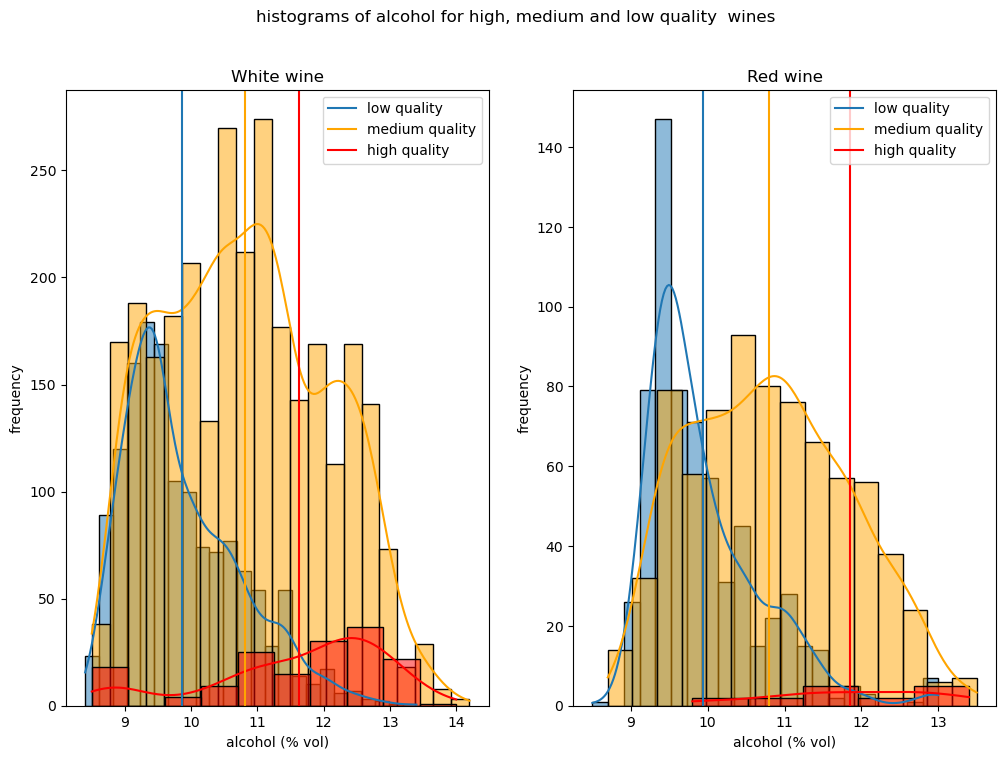

In [828]:
fig=plt.figure(figsize=(12,8))
plt.subplot2grid((1,2),(0,1))

sns.histplot(df_r[df_r['quality_label'] == 'low']['alcohol'], kde=True)
plt.suptitle('histograms of alcohol for high, medium and low quality  wines')
sns.histplot(df_r[df_r['quality_label'] == 'medium']['alcohol'], color='orange', kde=True)
plt.title('Red wine')
plt.xlabel('alcohol (% vol)')
plt.ylabel('frequency')
sns.histplot(df_r[df_r['quality_label'] == 'high']['alcohol'], color='red', kde=True)
plt.legend(['low quality','medium quality','high quality'])
plt.axvline(df_r[df_r['quality_label'] == 'low']['alcohol'].mean())
plt.axvline(df_r[df_r['quality_label'] == 'medium']['alcohol'].mean(), color='orange')

plt.axvline(df_r[df_r['quality_label'] == 'high']['alcohol'].mean(), color='red')
plt.subplot2grid((1,2),(0,0))
plt.title('White wine')
sns.histplot(df_w[df_w['quality_label'] == 'low']['alcohol'], kde=True)

sns.histplot(df_w[df_w['quality_label'] == 'medium']['alcohol'], color='orange', kde=True)
plt.xlabel('alcohol (% vol)')
plt.ylabel('frequency')
sns.histplot(df_w[df_w['quality_label'] == 'high']['alcohol'], color='red', kde=True)
plt.legend(['low quality','medium quality','high quality'])
plt.axvline(df_w[df_w['quality_label'] == 'low']['alcohol'].mean())
plt.axvline(df_w[df_w['quality_label'] == 'medium']['alcohol'].mean(), color='orange')

plt.axvline(df_w[df_w['quality_label'] == 'high']['alcohol'].mean(), color='red')

In [816]:
# f test to see if mean alcohol is the same within three wine qualities
f , p =stats.f_oneway(df_r[df_r['quality_label']== 'low']['alcohol'],df_r[df_r['quality_label']== 'medium']['alcohol'],
df_r[df_r['quality_label']== 'high']['alcohol'],)
print('{} and {} are the f and p values'.format(f,p))

179.13728860872146 and 4.173108863367924e-70 are the f and p values


In [829]:
# f test to see if mean alcohol is the same within three wine qualities
f , p =stats.f_oneway(df_w[df_w['quality_label']== 'low']['alcohol'],df_w[df_w['quality_label']== 'medium']['alcohol'],
df_w[df_w['quality_label']== 'high']['alcohol'],)
print('{} and {} are the f and p values'.format(f,p))

424.0815170678254 and 2.3573557491765742e-169 are the f and p values


In [837]:
# F is large, P is very small which indicate null hypothesys must be rejected. These imply that the mean alcohol is not the same in different qualities of red wines
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('alcohol ~ C(quality_label)', data=df_w).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table


,sum_sq,df,F,PR(>F)
C(quality_label),1067.099759,2.0,424.081517,2.357356e-169
Residual,5618.810689,4466.0,NaN,NaN


In [842]:
# to find out which groups are different from each other we make a post hoc test.
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=df_r, res_var='alcohol', xfac_var='quality_label', anova_model='alcohol ~ C(quality_label)')
res.tukey_summary


/Users/marziehbaes/opt/anaconda3/lib/python3.9/site-packages/bioinfokit/analys.py:365: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,low,medium,0.859854,0.746628,0.973080,25.197469,0.001
1,low,high,1.913889,1.377997,2.449780,11.850032,0.001
2,medium,high,1.054035,0.519096,1.588974,6.537780,0.001


In [846]:
# to find out which groups are different from each other we make a post hoc test.
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=df_w, res_var='alcohol', xfac_var='quality_label', anova_model='alcohol ~ C(quality_label)')
res.tukey_summary

/Users/marziehbaes/opt/anaconda3/lib/python3.9/site-packages/bioinfokit/analys.py:365: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,medium,low,0.955213,0.870102,1.040325,37.211319,0.001
1,medium,high,0.807279,0.594313,1.020246,12.568312,0.001
2,low,high,1.762493,1.543869,1.981117,26.729730,0.001


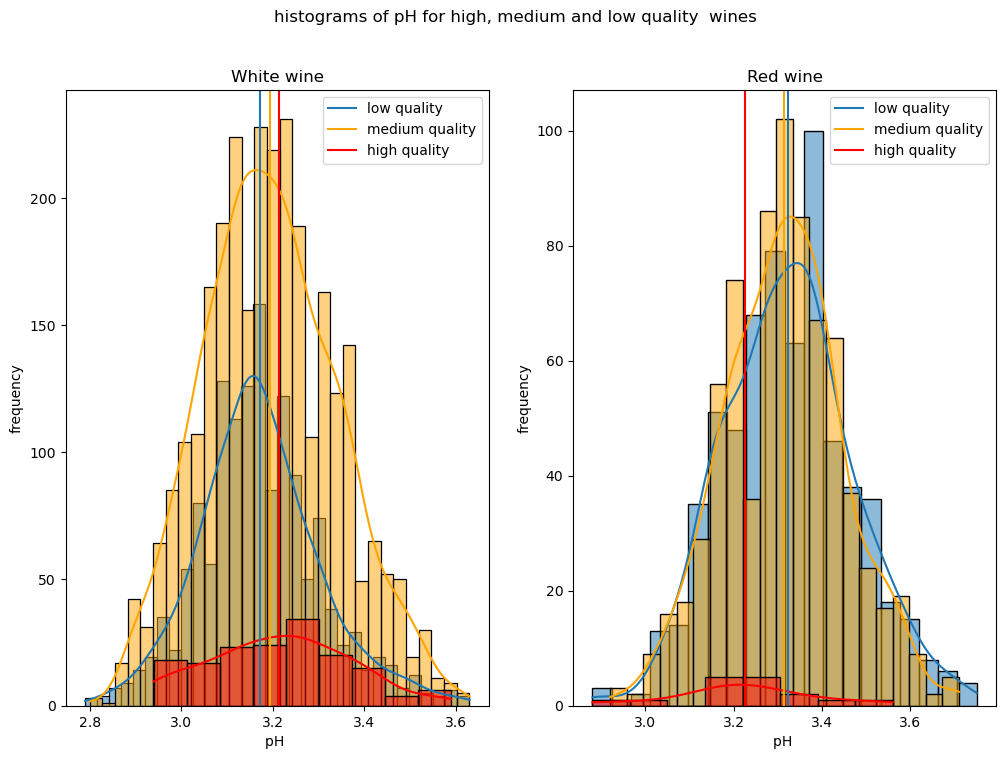

In [889]:
fig=plt.figure(figsize=(12,8))
plt.subplot2grid((1,2),(0,1))

sns.histplot(df_r[df_r['quality_label'] == 'low']['pH'], kde=True)
plt.suptitle('histograms of pH for high, medium and low quality  wines')
sns.histplot(df_r[df_r['quality_label'] == 'medium']['pH'], color='orange', kde=True)
plt.title('Red wine')
plt.xlabel('pH ')
plt.ylabel('frequency')
sns.histplot(df_r[df_r['quality_label'] == 'high']['pH'], color='red', kde=True)
plt.legend(['low quality','medium quality','high quality'])
plt.axvline(df_r[df_r['quality_label'] == 'low']['pH'].mean())
plt.axvline(df_r[df_r['quality_label'] == 'medium']['pH'].mean(), color='orange')

plt.axvline(df_r[df_r['quality_label'] == 'high']['pH'].mean(), color='red')
plt.subplot2grid((1,2),(0,0))
plt.title('White wine')
sns.histplot(df_w[df_w['quality_label'] == 'low']['pH'], kde=True)

sns.histplot(df_w[df_w['quality_label'] == 'medium']['pH'], color='orange', kde=True)
plt.xlabel('pH ')
plt.ylabel('frequency')
sns.histplot(df_w[df_w['quality_label'] == 'high']['pH'], color='red', kde=True)
plt.legend(['low quality','medium quality','high quality'])
plt.axvline(df_w[df_w['quality_label'] == 'low']['pH'].mean())
plt.axvline(df_w[df_w['quality_label'] == 'medium']['pH'].mean(), color='orange')

plt.axvline(df_w[df_w['quality_label'] == 'high']['pH'].mean(), color='red')

In [881]:
# f test to see if mean pH is the same within three wine qualities
f , p =stats.f_oneway(df_w[df_w['quality_label']== 'low']['pH'],df_w[df_w['quality_label']== 'medium']['pH'],
df_w[df_w['quality_label']== 'high']['pH'],)
print('{} and {} are the f and p values'.format(f,p))

15.284211408865591 and 2.4252986734418086e-07 are the f and p values


In [882]:
# f test to see if mean pH is the same within three wine qualities
f , p =stats.f_oneway(df_r[df_r['quality_label']== 'low']['pH'],df_r[df_r['quality_label']== 'medium']['pH'],
df_r[df_r['quality_label']== 'high']['pH'],)
print('{} and {} are the f and p values'.format(f,p))

4.322656806973283 and 0.013439455565052676 are the f and p values


In [887]:
# we have to accept null hypothesys for red wine
import scipy
#dfn= group -1 (3-1), dfd= n - group (1424-3)
scipy.stats.f.ppf(q=1-.01, dfn=2, dfd=1421)


4.6201268970572285

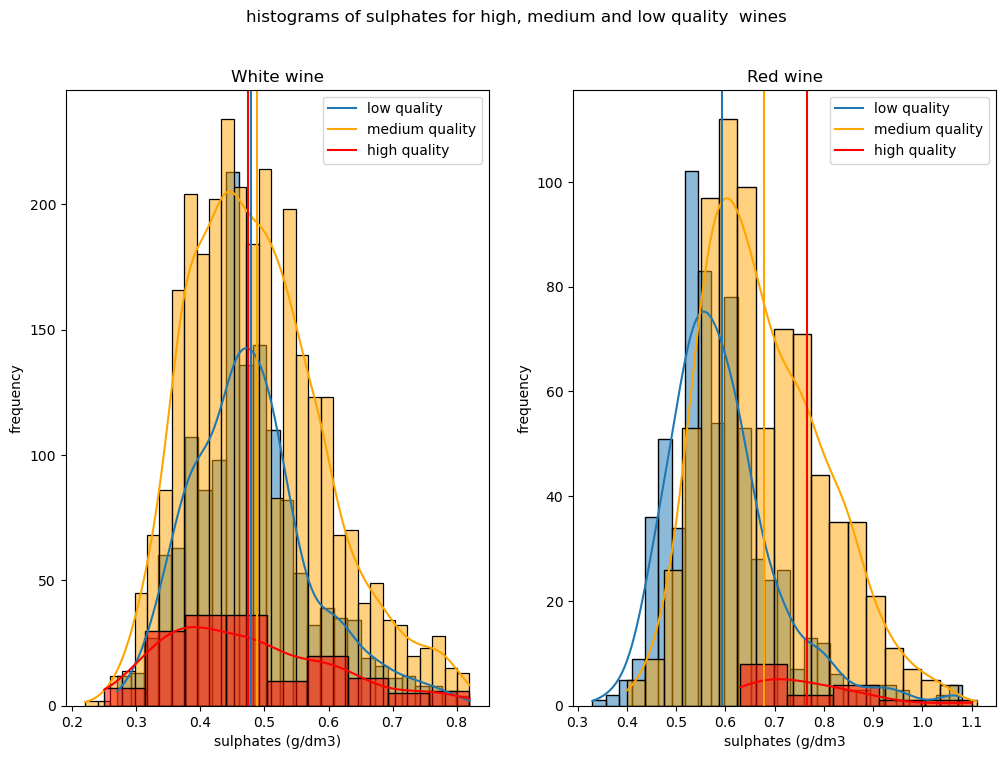

In [891]:
fig=plt.figure(figsize=(12,8))
plt.subplot2grid((1,2),(0,1))

sns.histplot(df_r[df_r['quality_label'] == 'low']['sulphates'], kde=True)
plt.suptitle('histograms of sulphates for high, medium and low quality  wines')
sns.histplot(df_r[df_r['quality_label'] == 'medium']['sulphates'], color='orange', kde=True)
plt.title('Red wine')
plt.xlabel('sulphates (g/dm3')
plt.ylabel('frequency')
sns.histplot(df_r[df_r['quality_label'] == 'high']['sulphates'], color='red', kde=True)
plt.legend(['low quality','medium quality','high quality'])
plt.axvline(df_r[df_r['quality_label'] == 'low']['sulphates'].mean())
plt.axvline(df_r[df_r['quality_label'] == 'medium']['sulphates'].mean(), color='orange')

plt.axvline(df_r[df_r['quality_label'] == 'high']['sulphates'].mean(), color='red')
plt.subplot2grid((1,2),(0,0))
plt.title('White wine')
sns.histplot(df_w[df_w['quality_label'] == 'low']['sulphates'], kde=True)

sns.histplot(df_w[df_w['quality_label'] == 'medium']['sulphates'], color='orange', kde=True)
plt.xlabel('sulphates (g/dm3)')
plt.ylabel('frequency')
sns.histplot(df_w[df_w['quality_label'] == 'high']['sulphates'], color='red', kde=True)
plt.legend(['low quality','medium quality','high quality'])
plt.axvline(df_w[df_w['quality_label'] == 'low']['sulphates'].mean())
plt.axvline(df_w[df_w['quality_label'] == 'medium']['sulphates'].mean(), color='orange')

plt.axvline(df_w[df_w['quality_label'] == 'high']['sulphates'].mean(), color='red')

In [892]:
# f test to see if mean sulphates is the same within three wine qualities
f , p =stats.f_oneway(df_r[df_r['quality_label']== 'low']['sulphates'],df_r[df_r['quality_label']== 'medium']['sulphates'],
df_r[df_r['quality_label']== 'high']['sulphates'],)
print('{} and {} are the f and p values'.format(f,p))

96.82350561522537 and 3.792822534372535e-40 are the f and p values


In [898]:
# f test to see if mean sulphates is the same within three wine qualities
f , p =stats.f_oneway(df_w[df_w['quality_label']== 'low']['sulphates'],df_w[df_w['quality_label']== 'medium']['sulphates'],
df_w[df_w['quality_label']== 'high']['sulphates'],)
print('{} and {} are the f and p values'.format(f,p))

5.168768233249471 and 0.005725672182120951 are the f and p values


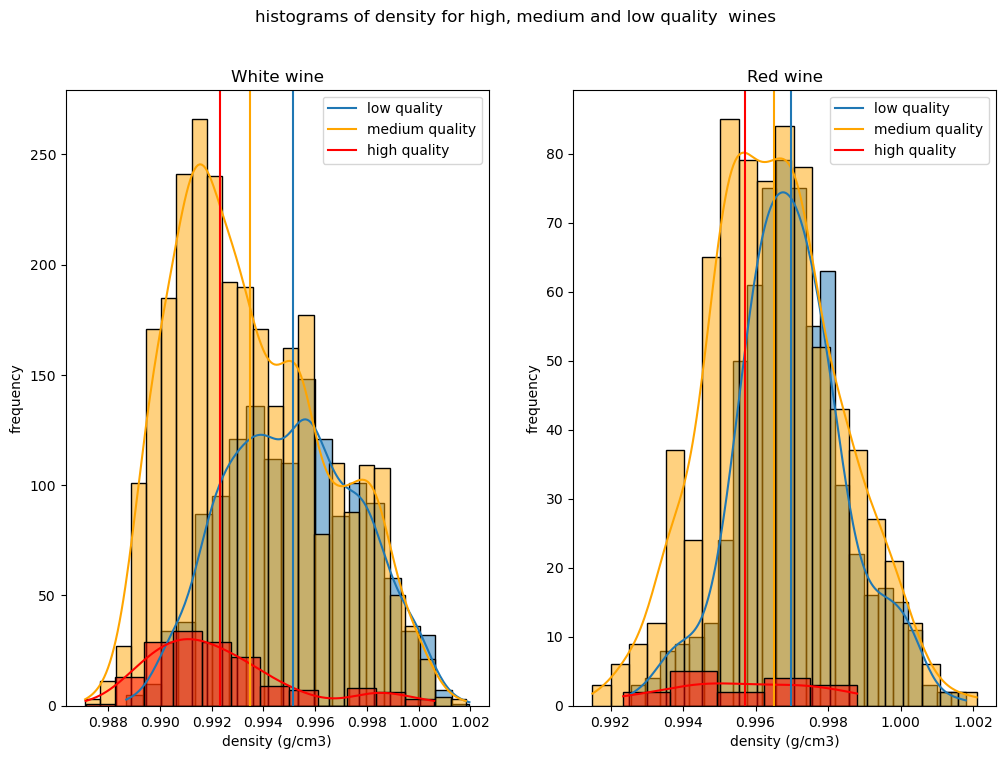

In [918]:
fig=plt.figure(figsize=(12,8))
plt.subplot2grid((1,2),(0,1))

sns.histplot(df_r[df_r['quality_label'] == 'low']['density'], kde=True)
plt.suptitle('histograms of density for high, medium and low quality  wines')
sns.histplot(df_r[df_r['quality_label'] == 'medium']['density'], color='orange', kde=True)
plt.title('Red wine')
plt.xlabel('density (g/cm3)')
plt.ylabel('frequency')
sns.histplot(df_r[df_r['quality_label'] == 'high']['density'], color='red', kde=True)
plt.legend(['low quality','medium quality','high quality'])
plt.axvline(df_r[df_r['quality_label'] == 'low']['density'].mean())
plt.axvline(df_r[df_r['quality_label'] == 'medium']['density'].mean(), color='orange')

plt.axvline(df_r[df_r['quality_label'] == 'high']['density'].mean(), color='red')
plt.subplot2grid((1,2),(0,0))
plt.title('White wine')
sns.histplot(df_w[df_w['quality_label'] == 'low']['density'], kde=True)

sns.histplot(df_w[df_w['quality_label'] == 'medium']['density'], color='orange', kde=True)
plt.xlabel('density (g/cm3)')
plt.ylabel('frequency')
sns.histplot(df_w[df_w['quality_label'] == 'high']['density'], color='red', kde=True)
plt.legend(['low quality','medium quality','high quality'])
plt.axvline(df_w[df_w['quality_label'] == 'low']['density'].mean())
plt.axvline(df_w[df_w['quality_label'] == 'medium']['density'].mean(), color='orange')

plt.axvline(df_w[df_w['quality_label'] == 'high']['density'].mean(), color='red')

In [895]:
# f test to see if mean density is the same within three wine qualities
f , p =stats.f_oneway(df_r[df_r['quality_label']== 'low']['density'],df_r[df_r['quality_label']== 'medium']['density'],
df_r[df_r['quality_label']== 'high']['density'],)
print('{} and {} are the f and p values'.format(f,p))

17.058959467415974 and 4.7745143404633076e-08 are the f and p values


In [897]:
# f test to see if mean density is the same within three wine qualities
f , p =stats.f_oneway(df_w[df_w['quality_label']== 'low']['density'],df_w[df_w['quality_label']== 'medium']['density'],
df_w[df_w['quality_label']== 'high']['density'],)
print('{} and {} are the f and p values'.format(f,p))

193.42577706956598 and 2.736421283058138e-81 are the f and p values


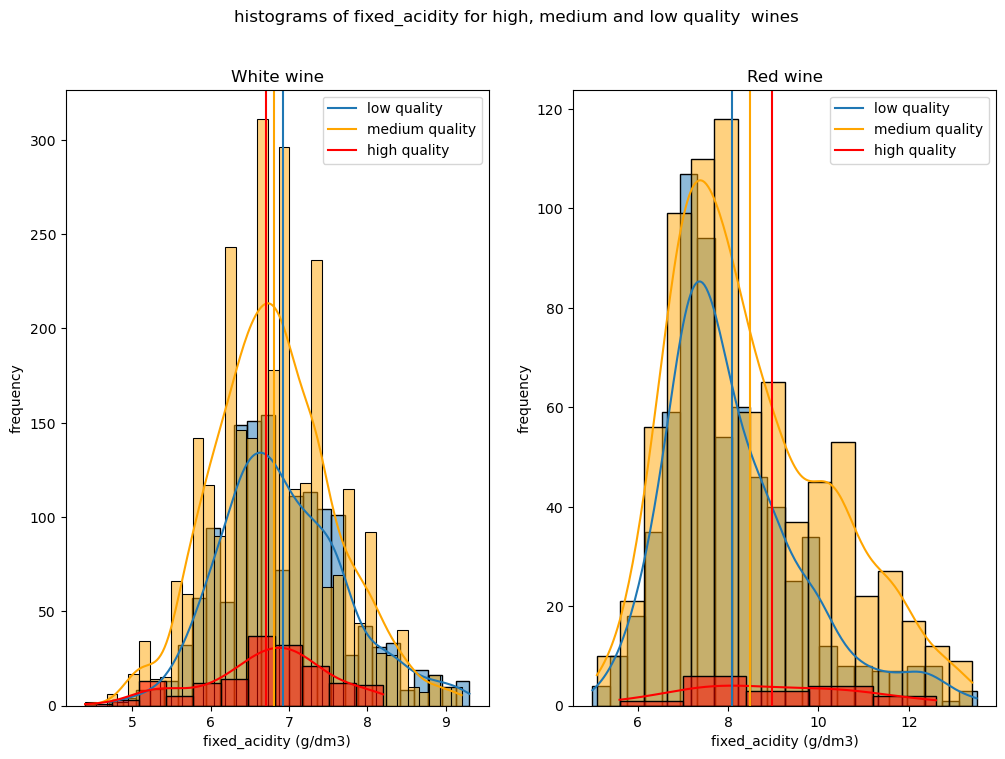

In [923]:
fig=plt.figure(figsize=(12,8))
plt.subplot2grid((1,2),(0,1))

sns.histplot(df_r[df_r['quality_label'] == 'low']['fixed_acidity'], kde=True)
plt.suptitle('histograms of fixed_acidity for high, medium and low quality  wines')
sns.histplot(df_r[df_r['quality_label'] == 'medium']['fixed_acidity'], color='orange', kde=True)
plt.title('Red wine')
plt.xlabel('fixed_acidity (g/dm3)')
plt.ylabel('frequency')
sns.histplot(df_r[df_r['quality_label'] == 'high']['fixed_acidity'], color='red', kde=True)
plt.legend(['low quality','medium quality','high quality'])
plt.axvline(df_r[df_r['quality_label'] == 'low']['fixed_acidity'].mean())
plt.axvline(df_r[df_r['quality_label'] == 'medium']['fixed_acidity'].mean(), color='orange')

plt.axvline(df_r[df_r['quality_label'] == 'high']['fixed_acidity'].mean(), color='red')
plt.subplot2grid((1,2),(0,0))
plt.title('White wine')
sns.histplot(df_w[df_w['quality_label'] == 'low']['fixed_acidity'], kde=True)

sns.histplot(df_w[df_w['quality_label'] == 'medium']['fixed_acidity'], color='orange', kde=True)
plt.xlabel('fixed_acidity (g/dm3)')
plt.ylabel('frequency')
sns.histplot(df_w[df_w['quality_label'] == 'high']['fixed_acidity'], color='red', kde=True)
plt.legend(['low quality','medium quality','high quality'])
plt.axvline(df_w[df_w['quality_label'] == 'low']['fixed_acidity'].mean())
plt.axvline(df_w[df_w['quality_label'] == 'medium']['fixed_acidity'].mean(), color='orange')

plt.axvline(df_w[df_w['quality_label'] == 'high']['fixed_acidity'].mean(), color='red')

In [901]:
# f test to see if mean fixed_acidity is the same within three wine qualities
f , p =stats.f_oneway(df_r[df_r['quality_label']== 'low']['fixed_acidity'],df_r[df_r['quality_label']== 'medium']['fixed_acidity'],
df_r[df_r['quality_label']== 'high']['fixed_acidity'],)
print('{} and {} are the f and p values'.format(f,p))

11.075105853715176 and 1.6875048699810325e-05 are the f and p values


In [902]:
# f test to see if mean fixed_acidity is the same within three wine qualities
f , p =stats.f_oneway(df_w[df_w['quality_label']== 'low']['fixed_acidity'],df_w[df_w['quality_label']== 'medium']['fixed_acidity'],
df_w[df_w['quality_label']== 'high']['fixed_acidity'],)
print('{} and {} are the f and p values'.format(f,p))

13.956084908626666 and 9.074262628165007e-07 are the f and p values


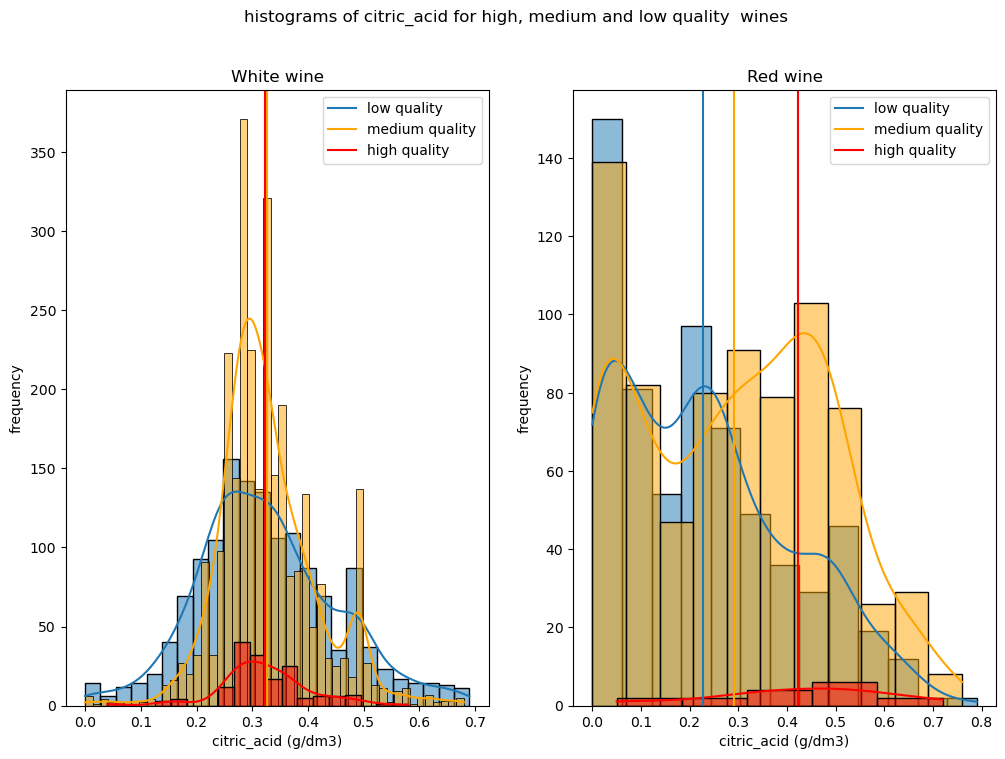

In [922]:
fig=plt.figure(figsize=(12,8))
plt.subplot2grid((1,2),(0,1))

sns.histplot(df_r[df_r['quality_label'] == 'low']['citric_acid'], kde=True)
plt.suptitle('histograms of citric_acid for high, medium and low quality  wines')
sns.histplot(df_r[df_r['quality_label'] == 'medium']['citric_acid'], color='orange', kde=True)
plt.title('Red wine')
plt.xlabel('citric_acid (g/dm3)')
plt.ylabel('frequency')
sns.histplot(df_r[df_r['quality_label'] == 'high']['citric_acid'], color='red', kde=True)
plt.legend(['low quality','medium quality','high quality'])
plt.axvline(df_r[df_r['quality_label'] == 'low']['citric_acid'].mean())
plt.axvline(df_r[df_r['quality_label'] == 'medium']['citric_acid'].mean(), color='orange')

plt.axvline(df_r[df_r['quality_label'] == 'high']['citric_acid'].mean(), color='red')
plt.subplot2grid((1,2),(0,0))
plt.title('White wine')
sns.histplot(df_w[df_w['quality_label'] == 'low']['citric_acid'], kde=True)

sns.histplot(df_w[df_w['quality_label'] == 'medium']['citric_acid'], color='orange', kde=True)
plt.xlabel('citric_acid (g/dm3)')
plt.ylabel('frequency')
sns.histplot(df_w[df_w['quality_label'] == 'high']['citric_acid'], color='red', kde=True)
plt.legend(['low quality','medium quality','high quality'])
plt.axvline(df_w[df_w['quality_label'] == 'low']['citric_acid'].mean())
plt.axvline(df_w[df_w['quality_label'] == 'medium']['citric_acid'].mean(), color='orange')

plt.axvline(df_w[df_w['quality_label'] == 'high']['citric_acid'].mean(), color='red')

In [906]:
# f test to see if mean citric_acid is the same within three wine qualities
f , p =stats.f_oneway(df_w[df_w['quality_label']== 'low']['citric_acid'],df_w[df_w['quality_label']== 'medium']['citric_acid'],
df_w[df_w['quality_label']== 'high']['citric_acid'],)
print('{} and {} are the f and p values'.format(f,p))

0.21773956559529464 and 0.8043434290827118 are the f and p values


In [907]:
# f test to see if mean citric_acid is the same within three wine qualities
f , p =stats.f_oneway(df_r[df_r['quality_label']== 'low']['citric_acid'],df_r[df_r['quality_label']== 'medium']['citric_acid'],
df_r[df_r['quality_label']== 'high']['citric_acid'],)
print('{} and {} are the f and p values'.format(f,p))

26.14622206114847 and 7.0596827800557954e-12 are the f and p values


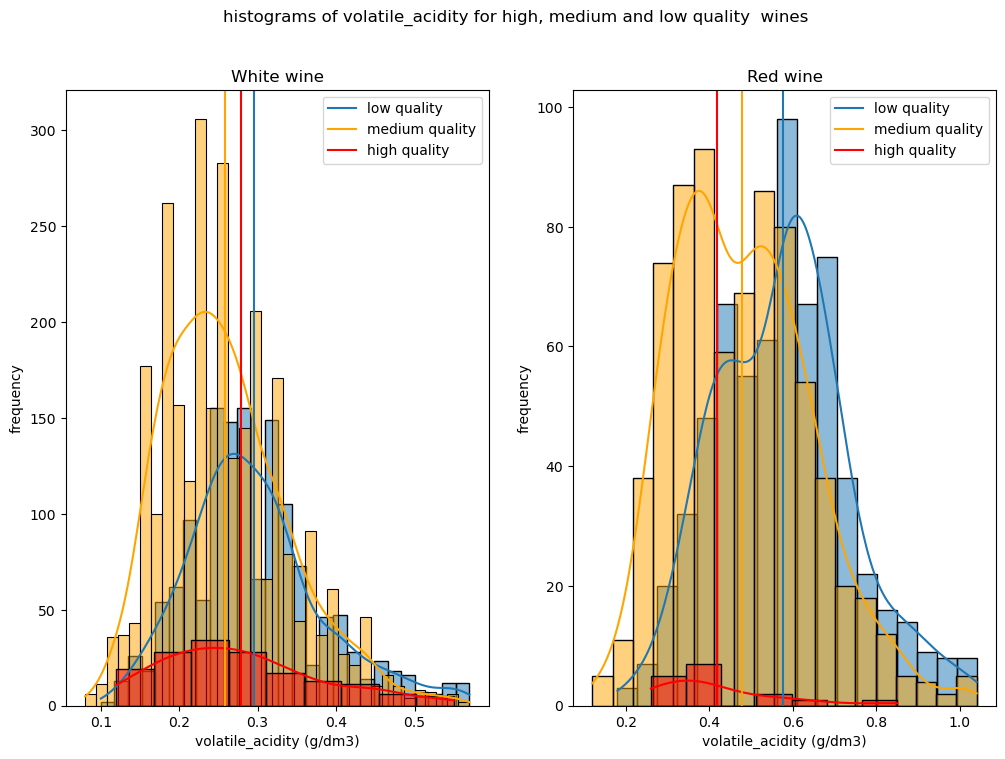

In [921]:
fig=plt.figure(figsize=(12,8))
plt.subplot2grid((1,2),(0,1))

sns.histplot(df_r[df_r['quality_label'] == 'low']['volatile_acidity'], kde=True)
plt.suptitle('histograms of volatile_acidity for high, medium and low quality  wines')
sns.histplot(df_r[df_r['quality_label'] == 'medium']['volatile_acidity'], color='orange', kde=True)
plt.title('Red wine')
plt.xlabel('volatile_acidity (g/dm3)')
plt.ylabel('frequency')
sns.histplot(df_r[df_r['quality_label'] == 'high']['volatile_acidity'], color='red', kde=True)
plt.legend(['low quality','medium quality','high quality'])
plt.axvline(df_r[df_r['quality_label'] == 'low']['volatile_acidity'].mean())
plt.axvline(df_r[df_r['quality_label'] == 'medium']['volatile_acidity'].mean(), color='orange')

plt.axvline(df_r[df_r['quality_label'] == 'high']['volatile_acidity'].mean(), color='red')
plt.subplot2grid((1,2),(0,0))
plt.title('White wine')
sns.histplot(df_w[df_w['quality_label'] == 'low']['volatile_acidity'], kde=True)

sns.histplot(df_w[df_w['quality_label'] == 'medium']['volatile_acidity'], color='orange', kde=True)
plt.xlabel('volatile_acidity (g/dm3)')
plt.ylabel('frequency')
sns.histplot(df_w[df_w['quality_label'] == 'high']['volatile_acidity'], color='red', kde=True)
plt.legend(['low quality','medium quality','high quality'])
plt.axvline(df_w[df_w['quality_label'] == 'low']['volatile_acidity'].mean())
plt.axvline(df_w[df_w['quality_label'] == 'medium']['volatile_acidity'].mean(), color='orange')

plt.axvline(df_w[df_w['quality_label'] == 'high']['volatile_acidity'].mean(), color='red')

In [910]:
# f test to see if mean volatile_acidity is the same within three wine qualities
f , p =stats.f_oneway(df_w[df_w['quality_label']== 'low']['volatile_acidity'],df_w[df_w['quality_label']== 'medium']['volatile_acidity'],
df_w[df_w['quality_label']== 'high']['volatile_acidity'],)
print('{} and {} are the f and p values'.format(f,p))

98.5131090819452 and 1.3588563967051452e-42 are the f and p values


In [911]:
# f test to see if mean volatile_acidity is the same within three wine qualities
f , p =stats.f_oneway(df_r[df_r['quality_label']== 'low']['volatile_acidity'],df_r[df_r['quality_label']== 'medium']['volatile_acidity'],
df_r[df_r['quality_label']== 'high']['volatile_acidity'],)
print('{} and {} are the f and p values'.format(f,p))

68.57789866942939 and 3.69881166529189e-29 are the f and p values


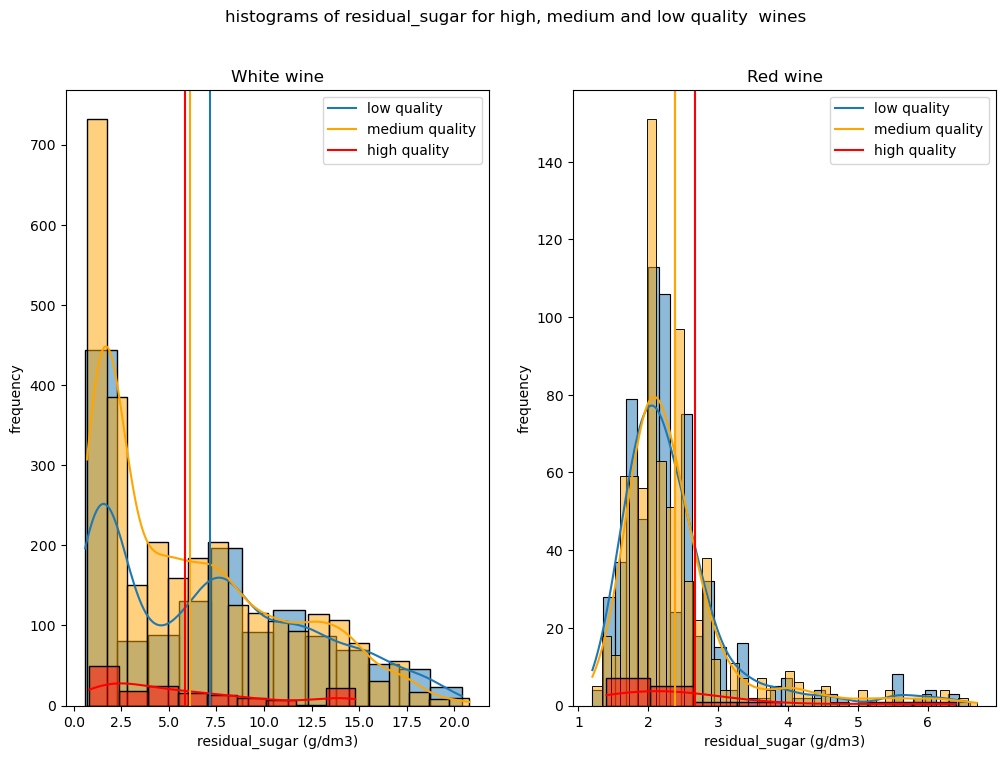

In [924]:
fig=plt.figure(figsize=(12,8))
plt.subplot2grid((1,2),(0,1))

sns.histplot(df_r[df_r['quality_label'] == 'low']['residual_sugar'], kde=True)
plt.suptitle('histograms of residual_sugar for high, medium and low quality  wines')
sns.histplot(df_r[df_r['quality_label'] == 'medium']['residual_sugar'], color='orange', kde=True)
plt.title('Red wine')
plt.xlabel('residual_sugar (g/dm3)')
plt.ylabel('frequency')
sns.histplot(df_r[df_r['quality_label'] == 'high']['residual_sugar'], color='red', kde=True)
plt.legend(['low quality','medium quality','high quality'])
plt.axvline(df_r[df_r['quality_label'] == 'low']['residual_sugar'].mean())
plt.axvline(df_r[df_r['quality_label'] == 'medium']['residual_sugar'].mean(), color='orange')

plt.axvline(df_r[df_r['quality_label'] == 'high']['residual_sugar'].mean(), color='red')
plt.subplot2grid((1,2),(0,0))
plt.title('White wine')
sns.histplot(df_w[df_w['quality_label'] == 'low']['residual_sugar'], kde=True)

sns.histplot(df_w[df_w['quality_label'] == 'medium']['residual_sugar'], color='orange', kde=True)
plt.xlabel('residual_sugar (g/dm3)')
plt.ylabel('frequency')
sns.histplot(df_w[df_w['quality_label'] == 'high']['residual_sugar'], color='red', kde=True)
plt.legend(['low quality','medium quality','high quality'])
plt.axvline(df_w[df_w['quality_label'] == 'low']['residual_sugar'].mean())
plt.axvline(df_w[df_w['quality_label'] == 'medium']['residual_sugar'].mean(), color='orange')

plt.axvline(df_w[df_w['quality_label'] == 'high']['residual_sugar'].mean(), color='red')

In [913]:
# f test to see if mean residual_sugar is the same within three wine qualities
f , p =stats.f_oneway(df_w[df_w['quality_label']== 'low']['residual_sugar'],df_w[df_w['quality_label']== 'medium']['residual_sugar'],
df_w[df_w['quality_label']== 'high']['residual_sugar'],)
print('{} and {} are the f and p values'.format(f,p))

22.774309603942605 and 1.443246315868709e-10 are the f and p values


In [914]:
# f test to see if mean residual_sugar is the same within three wine qualities
f , p =stats.f_oneway(df_r[df_r['quality_label']== 'low']['residual_sugar'],df_r[df_r['quality_label']== 'medium']['residual_sugar'],
df_r[df_r['quality_label']== 'high']['residual_sugar'],)
print('{} and {} are the f and p values'.format(f,p))

0.8629567595647498 and 0.4221337297826323 are the f and p values


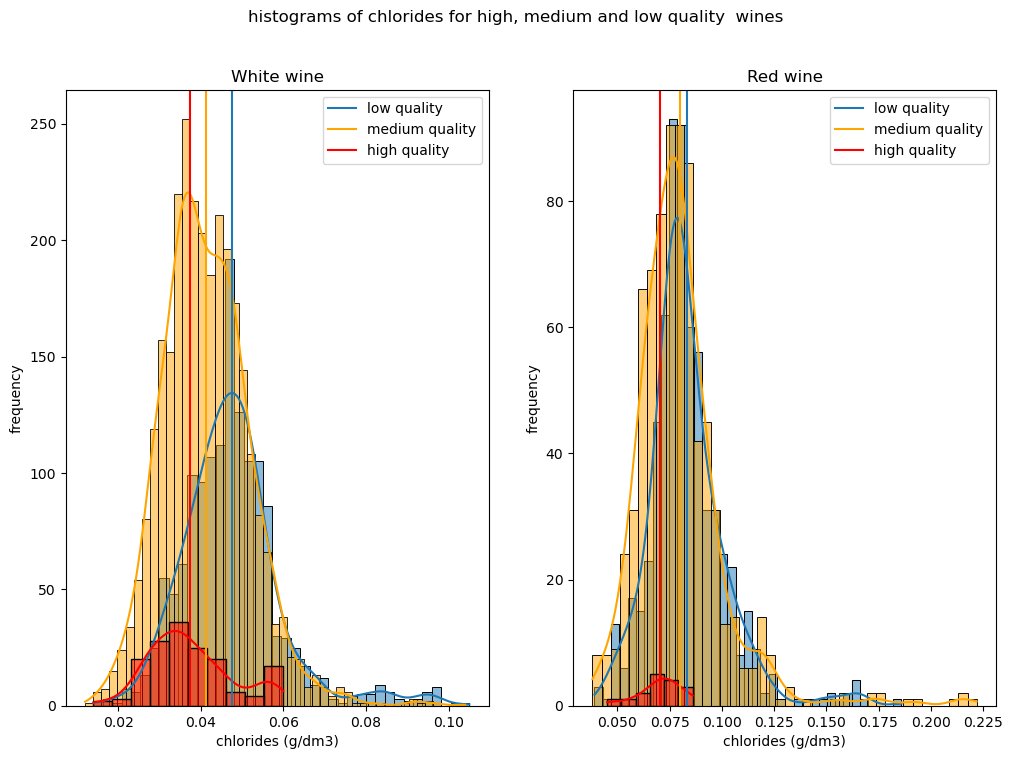

In [925]:
fig=plt.figure(figsize=(12,8))
plt.subplot2grid((1,2),(0,1))

sns.histplot(df_r[df_r['quality_label'] == 'low']['chlorides'], kde=True)
plt.suptitle('histograms of chlorides for high, medium and low quality  wines')
sns.histplot(df_r[df_r['quality_label'] == 'medium']['chlorides'], color='orange', kde=True)
plt.title('Red wine')
plt.xlabel('chlorides (g/dm3)')
plt.ylabel('frequency')
sns.histplot(df_r[df_r['quality_label'] == 'high']['chlorides'], color='red', kde=True)
plt.legend(['low quality','medium quality','high quality'])
plt.axvline(df_r[df_r['quality_label'] == 'low']['chlorides'].mean())
plt.axvline(df_r[df_r['quality_label'] == 'medium']['chlorides'].mean(), color='orange')

plt.axvline(df_r[df_r['quality_label'] == 'high']['chlorides'].mean(), color='red')
plt.subplot2grid((1,2),(0,0))
plt.title('White wine')
sns.histplot(df_w[df_w['quality_label'] == 'low']['chlorides'], kde=True)

sns.histplot(df_w[df_w['quality_label'] == 'medium']['chlorides'], color='orange', kde=True)
plt.xlabel('chlorides (g/dm3)')
plt.ylabel('frequency')
sns.histplot(df_w[df_w['quality_label'] == 'high']['chlorides'], color='red', kde=True)
plt.legend(['low quality','medium quality','high quality'])
plt.axvline(df_w[df_w['quality_label'] == 'low']['chlorides'].mean())
plt.axvline(df_w[df_w['quality_label'] == 'medium']['chlorides'].mean(), color='orange')

plt.axvline(df_w[df_w['quality_label'] == 'high']['chlorides'].mean(), color='red')

In [916]:
# f test to see if mean chlorides is the same within three wine qualities
f , p =stats.f_oneway(df_w[df_w['quality_label']== 'low']['chlorides'],df_w[df_w['quality_label']== 'medium']['chlorides'],
df_w[df_w['quality_label']== 'high']['chlorides'],)
print('{} and {} are the f and p values'.format(f,p))

172.15593299353833 and 9.45513708402307e-73 are the f and p values


In [917]:
# f test to see if mean chlorides is the same within three wine qualities
f , p =stats.f_oneway(df_r[df_r['quality_label']== 'low']['chlorides'],df_r[df_r['quality_label']== 'medium']['chlorides'],
df_r[df_r['quality_label']== 'high']['chlorides'],)
print('{} and {} are the f and p values'.format(f,p))

7.747893338206423 and 0.0004501394338354028 are the f and p values


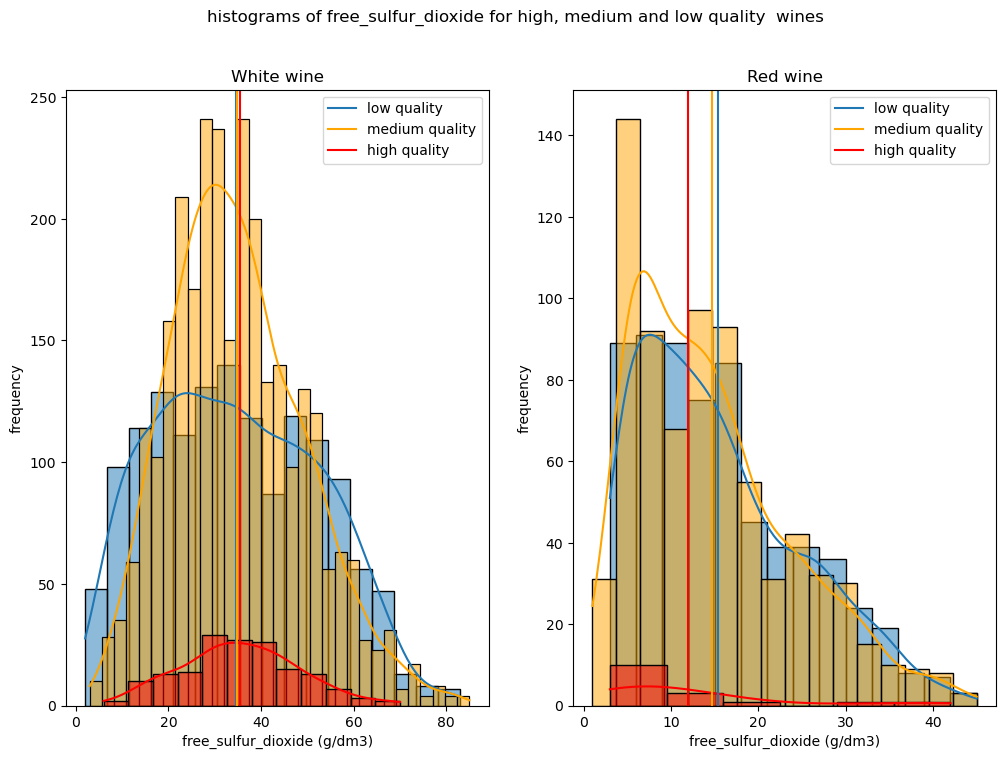

In [926]:
fig=plt.figure(figsize=(12,8))
plt.subplot2grid((1,2),(0,1))

sns.histplot(df_r[df_r['quality_label'] == 'low']['free_sulfur_dioxide'], kde=True)
plt.suptitle('histograms of free_sulfur_dioxide for high, medium and low quality  wines')
sns.histplot(df_r[df_r['quality_label'] == 'medium']['free_sulfur_dioxide'], color='orange', kde=True)
plt.title('Red wine')
plt.xlabel('free_sulfur_dioxide (g/dm3)')
plt.ylabel('frequency')
sns.histplot(df_r[df_r['quality_label'] == 'high']['free_sulfur_dioxide'], color='red', kde=True)
plt.legend(['low quality','medium quality','high quality'])
plt.axvline(df_r[df_r['quality_label'] == 'low']['free_sulfur_dioxide'].mean())
plt.axvline(df_r[df_r['quality_label'] == 'medium']['free_sulfur_dioxide'].mean(), color='orange')

plt.axvline(df_r[df_r['quality_label'] == 'high']['free_sulfur_dioxide'].mean(), color='red')
plt.subplot2grid((1,2),(0,0))
plt.title('White wine')
sns.histplot(df_w[df_w['quality_label'] == 'low']['free_sulfur_dioxide'], kde=True)

sns.histplot(df_w[df_w['quality_label'] == 'medium']['free_sulfur_dioxide'], color='orange', kde=True)
plt.xlabel('free_sulfur_dioxide (g/dm3)')
plt.ylabel('frequency')
sns.histplot(df_w[df_w['quality_label'] == 'high']['free_sulfur_dioxide'], color='red', kde=True)
plt.legend(['low quality','medium quality','high quality'])
plt.axvline(df_w[df_w['quality_label'] == 'low']['free_sulfur_dioxide'].mean())
plt.axvline(df_w[df_w['quality_label'] == 'medium']['free_sulfur_dioxide'].mean(), color='orange')

plt.axvline(df_w[df_w['quality_label'] == 'high']['free_sulfur_dioxide'].mean(), color='red')

In [927]:
# f test to see if mean free_sulfur_dioxide is the same within three wine qualities
f , p =stats.f_oneway(df_w[df_w['quality_label']== 'low']['free_sulfur_dioxide'],df_w[df_w['quality_label']== 'medium']['free_sulfur_dioxide'],
df_w[df_w['quality_label']== 'high']['free_sulfur_dioxide'],)
print('{} and {} are the f and p values'.format(f,p))

0.2207562882416854 and 0.8019208418810891 are the f and p values


In [928]:
# f test to see if mean free_sulfur_dioxide is the same within three wine qualities
f , p =stats.f_oneway(df_r[df_r['quality_label']== 'low']['free_sulfur_dioxide'],df_r[df_r['quality_label']== 'medium']['free_sulfur_dioxide'],
df_r[df_r['quality_label']== 'high']['free_sulfur_dioxide'],)
print('{} and {} are the f and p values'.format(f,p))

1.8943254343707716 and 0.1507994302349435 are the f and p values


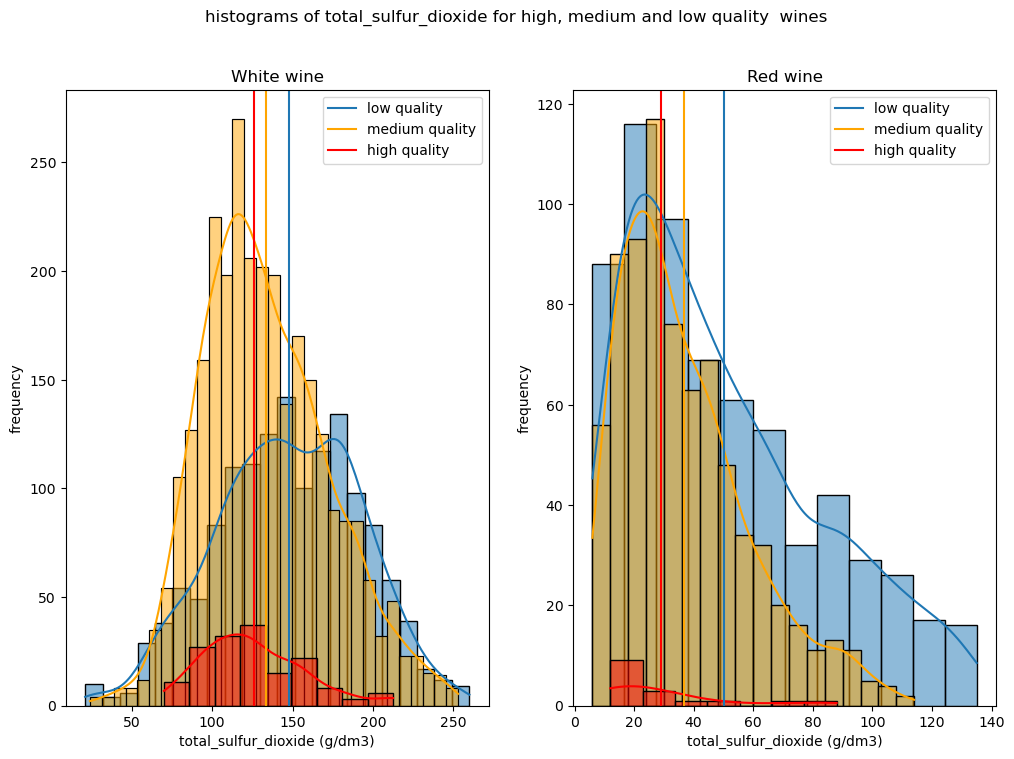

In [929]:
fig=plt.figure(figsize=(12,8))
plt.subplot2grid((1,2),(0,1))

sns.histplot(df_r[df_r['quality_label'] == 'low']['total_sulfur_dioxide'], kde=True)
plt.suptitle('histograms of total_sulfur_dioxide for high, medium and low quality  wines')
sns.histplot(df_r[df_r['quality_label'] == 'medium']['total_sulfur_dioxide'], color='orange', kde=True)
plt.title('Red wine')
plt.xlabel('total_sulfur_dioxide (g/dm3)')
plt.ylabel('frequency')
sns.histplot(df_r[df_r['quality_label'] == 'high']['total_sulfur_dioxide'], color='red', kde=True)
plt.legend(['low quality','medium quality','high quality'])
plt.axvline(df_r[df_r['quality_label'] == 'low']['total_sulfur_dioxide'].mean())
plt.axvline(df_r[df_r['quality_label'] == 'medium']['total_sulfur_dioxide'].mean(), color='orange')

plt.axvline(df_r[df_r['quality_label'] == 'high']['total_sulfur_dioxide'].mean(), color='red')
plt.subplot2grid((1,2),(0,0))
plt.title('White wine')
sns.histplot(df_w[df_w['quality_label'] == 'low']['total_sulfur_dioxide'], kde=True)

sns.histplot(df_w[df_w['quality_label'] == 'medium']['total_sulfur_dioxide'], color='orange', kde=True)
plt.xlabel('total_sulfur_dioxide (g/dm3)')
plt.ylabel('frequency')
sns.histplot(df_w[df_w['quality_label'] == 'high']['total_sulfur_dioxide'], color='red', kde=True)
plt.legend(['low quality','medium quality','high quality'])
plt.axvline(df_w[df_w['quality_label'] == 'low']['total_sulfur_dioxide'].mean())
plt.axvline(df_w[df_w['quality_label'] == 'medium']['total_sulfur_dioxide'].mean(), color='orange')

plt.axvline(df_w[df_w['quality_label'] == 'high']['total_sulfur_dioxide'].mean(), color='red')

In [930]:
# f test to see if mean total_sulfur_dioxide is the same within three wine qualities
f , p =stats.f_oneway(df_w[df_w['quality_label']== 'low']['total_sulfur_dioxide'],df_w[df_w['quality_label']== 'medium']['total_sulfur_dioxide'],
df_w[df_w['quality_label']== 'high']['total_sulfur_dioxide'],)
print('{} and {} are the f and p values'.format(f,p))

66.49524367479361 and 3.4922977820795934e-29 are the f and p values


In [931]:
# f test to see if mean total_sulfur_dioxide is the same within three wine qualities
f , p =stats.f_oneway(df_r[df_r['quality_label']== 'low']['total_sulfur_dioxide'],df_r[df_r['quality_label']== 'medium']['total_sulfur_dioxide'],
df_r[df_r['quality_label']== 'high']['total_sulfur_dioxide'],)
print('{} and {} are the f and p values'.format(f,p))

45.08703479054877 and 1.0354882760423977e-19 are the f and p values


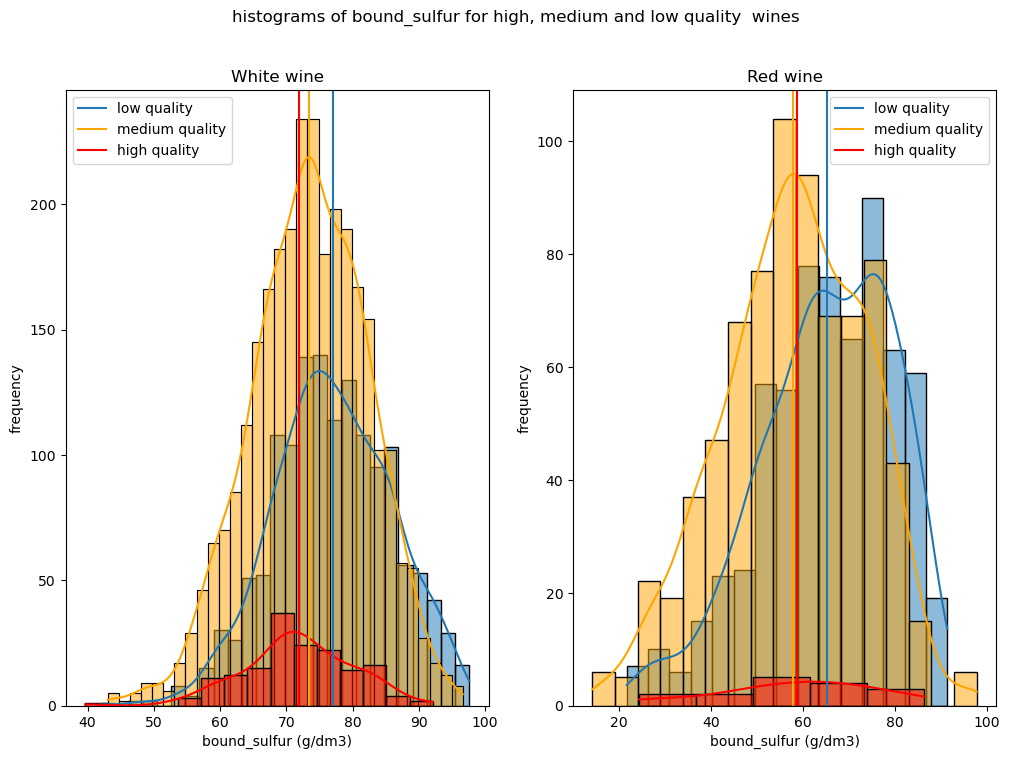

In [935]:
fig=plt.figure(figsize=(12,8))
plt.subplot2grid((1,2),(0,1))

sns.histplot(df_r[df_r['quality_label'] == 'low']['bound_sulfur'], kde=True)
plt.suptitle('histograms of bound_sulfur for high, medium and low quality  wines')
sns.histplot(df_r[df_r['quality_label'] == 'medium']['bound_sulfur'], color='orange', kde=True)
plt.title('Red wine')
plt.xlabel('bound_sulfur (g/dm3)')
plt.ylabel('frequency')
sns.histplot(df_r[df_r['quality_label'] == 'high']['bound_sulfur'], color='red', kde=True)
plt.legend(['low quality','medium quality','high quality'])
plt.axvline(df_r[df_r['quality_label'] == 'low']['bound_sulfur'].mean())
plt.axvline(df_r[df_r['quality_label'] == 'medium']['bound_sulfur'].mean(), color='orange')

plt.axvline(df_r[df_r['quality_label'] == 'high']['bound_sulfur'].mean(), color='red')
plt.subplot2grid((1,2),(0,0))
plt.title('White wine')
sns.histplot(df_w[df_w['quality_label'] == 'low']['bound_sulfur'], kde=True)

sns.histplot(df_w[df_w['quality_label'] == 'medium']['bound_sulfur'], color='orange', kde=True)
plt.xlabel('bound_sulfur (g/dm3)')
plt.ylabel('frequency')
sns.histplot(df_w[df_w['quality_label'] == 'high']['bound_sulfur'], color='red', kde=True)
plt.legend(['low quality','medium quality','high quality'])
plt.axvline(df_w[df_w['quality_label'] == 'low']['bound_sulfur'].mean())
plt.axvline(df_w[df_w['quality_label'] == 'medium']['bound_sulfur'].mean(), color='orange')

plt.axvline(df_w[df_w['quality_label'] == 'high']['bound_sulfur'].mean(), color='red')

In [936]:
# f test to see if mean bound_sulfur is the same within three wine qualities
f , p =stats.f_oneway(df_r[df_r['quality_label']== 'low']['bound_sulfur'],df_r[df_r['quality_label']== 'medium']['bound_sulfur'],
df_r[df_r['quality_label']== 'high']['bound_sulfur'],)
print('{} and {} are the f and p values'.format(f,p))

41.81958552144626 and 2.2511159144907833e-18 are the f and p values


In [937]:
# f test to see if mean bound_sulfur is the same within three wine qualities
f , p =stats.f_oneway(df_w[df_w['quality_label']== 'low']['bound_sulfur'],df_w[df_w['quality_label']== 'medium']['bound_sulfur'],
df_w[df_w['quality_label']== 'high']['bound_sulfur'],)
print('{} and {} are the f and p values'.format(f,p))

83.04215417454232 and 3.887533160803929e-36 are the f and p values


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


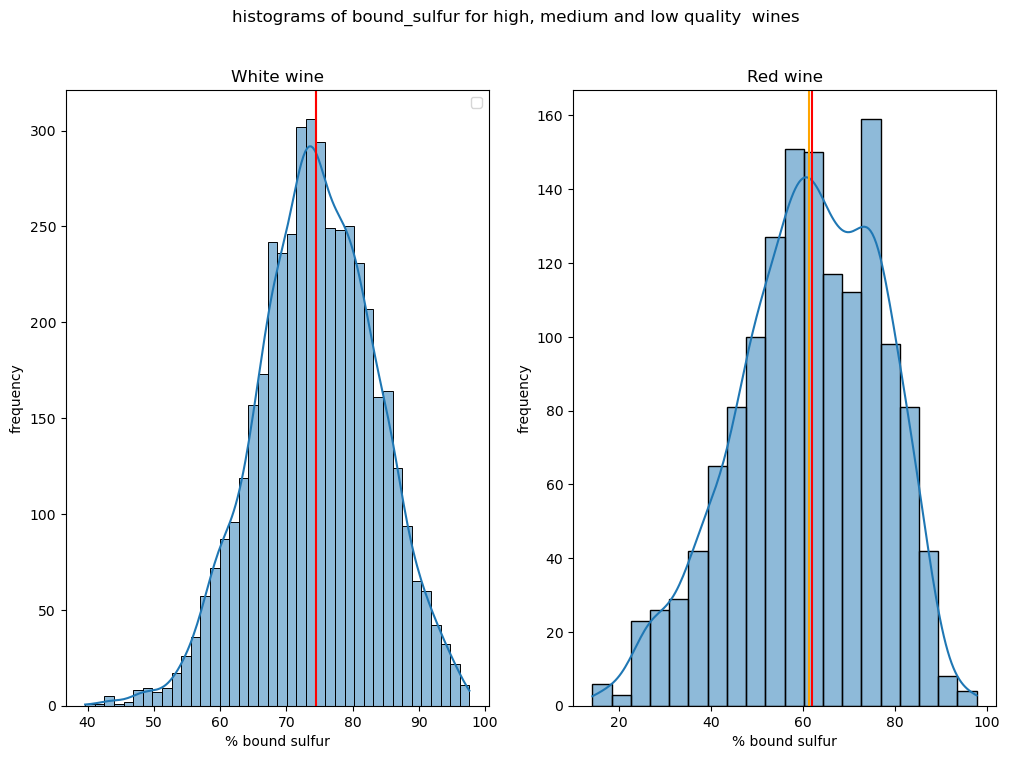

In [948]:
fig=plt.figure(figsize=(12,8))
plt.subplot2grid((1,2),(0,1))

sns.histplot(df_r['bound_sulfur'], kde=True)
plt.suptitle('histograms of bound_sulfur for high, medium and low quality  wines')
plt.xlabel('% bound sulfur')
plt.ylabel('frequency')

plt.axvline(df_r['bound_sulfur'].mean(), color='orange')
plt.axvline(df_r['bound_sulfur'].median(), color='red')
plt.title('Red wine')
plt.subplot2grid((1,2),(0,0))
plt.title('White wine')
plt.xlabel('% bound sulfur')
plt.ylabel('frequency')
sns.histplot(df_w['bound_sulfur'], kde=True)
plt.axvline(df_w['bound_sulfur'].mean(), color='orange')
plt.axvline(df_w['bound_sulfur'].median(), color='red')
plt.legend()